# **CO2 emissions (metric tons per capita) vs Social, Economic and Inclusivity Indicators**

## **A Regression Analysis**


### __1. PROBLEM STATEMENT__                                                   
Climate change is a pressing global challenge, with carbon dioxide (CO₂) emissions being a primary contributor. Understanding the socio-economic and environmental factors driving CO₂ emissions per capita is crucial for informed policymaking. This study aims to analyze the relationship between CO₂ emissions per capita and variables such as access to clean fuels and electricity, GDP, renewable energy consumption, net migration, tree cover loss and few more. The hypothesis is that these factors significantly influence CO₂ emissions. This regression analysis also seeks to identify key predictors and quantifying their impacts.


### __2. DATASET__

__2.1 Source:__ The data for this analysis was sourced from the World Bank's World Development Indicators (WDI) database. The dataset includes various economic, social and inclusivity indicators for different countries.

* Dataset Link

https://docs.google.com/spreadsheets/d/1UxP_IcYxyDpL_DPoFs2IXRdsKoiPyutd/edit?usp=sharing&ouid=117921897073227118173&rtpof=true&sd=true

___2.2 Description of Variables:__

1.   Access to clean fuels and technologies for cooking (% of population):   proportion of total population primarily using clean cooking fuels and technologies for cooking.

2.   Access to electricity (% of population): percentage of population with access to electricity.

3.   Adjusted savings: natural resources depletion (% of GNI): sum of net forest depletion, energy depletion, and mineral depletion.

4.   CO2 emissions (metric tons per capita): Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.   

5.   Energy use (kg of oil equivalent per capita): Energy use refers to use of primary energy before transformation to other end-use fuels, which is equal to indigenous production plus imports and stock changes, minus exports and fuels supplied to ships and aircraft engaged in international transport.

6.   Forest area (% of land area): Forest area is land under natural or planted stands of trees of at least 5 meters in situ, whether productive or not, and excludes tree stands in agricultural production systems

7.   Agricultural land (% of land area): Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures. 

8.   GDP growth (annual %): Annual percentage growth rate of GDP at market prices based on constant local currency. Aggregates are based on constant 2015 prices, expressed in U.S. dollars.

9.   Net migration: Net migration is the number of immigrants minus the number of emigrants, including citizens and noncitizens.

10.  PM2.5 air pollution, mean annual exposure (micrograms per cubic meter): Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.

11.  Population density (people per sq. km of land area): Population density is midyear population divided by land area in square kilometers. 

12.  Renewable energy consumption (% of total final energy consumption): Renewable energy consumption is the share of renewables energy in total final energy consumption.

13. Tree Cover Loss (hectares): Identifies areas of gross tree cover loss.  

__2.3 Sample Size:__ 191 observations

In [30]:
import pandas as pd
import numpy as np

__2.4 Checking for Missing Values__

In [31]:
df = pd.read_excel('data_final.xlsx')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 14 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Unnamed: 0                                                               191 non-null    int64  
 1   Access to clean fuels and technologies for cooking (% of population)     191 non-null    float64
 2   Access to electricity (% of population)                                  191 non-null    float64
 3   Adjusted savings: natural resources depletion (% of GNI)                 191 non-null    float64
 4   CO2 emissions (metric tons per capita)                                   191 non-null    float64
 5   Energy use (kg of oil equivalent per capita)                             191 non-null    float64
 6   Forest area (% of land area)                                             1

In [33]:
df1 = df.drop(['Unnamed: 0'], axis=1)

In [34]:
df1.head()

,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adjusted savings: natural resources depletion (% of GNI),CO2 emissions (metric tons per capita),Energy use (kg of oil equivalent per capita),Forest area (% of land area),Agricultural land (% of land area),GDP growth (annual %),Net migration,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Population density (people per sq. km of land area),Renewable energy consumption (% of total final energy consumption),Tree Cover Loss (hectares)
0,12.5,28.669672,5.640907,0.080361,5618.169063,1.852782,58.134400,11.229715,252185,46.151929,37.427274,33.88,236.0
1,52.0,99.371124,0.449098,1.360092,719.584378,28.309672,39.306569,5.526424,-50855,22.169490,109.908285,36.77,695.0
2,98.4,98.614319,22.883929,2.857927,983.682160,0.734127,17.302896,5.900000,-111256,34.001852,13.837232,0.58,4470.0
3,100.0,100.000000,4.747533,7.206274,2385.144571,34.042553,46.382979,5.397796,2467,12.178288,169.842553,16.61,2.0
4,42.6,29.448309,34.127119,0.812875,433.185634,60.105322,35.439961,15.030000,64009,28.316361,15.601956,68.38,93435.0


No missing observations found

### __3. Descriptive Statistics__

In [35]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Access to clean fuels and technologies for cooking (% of population),191.0,60.424869,39.575390,0.100000,17.300000,74.314286,100.000000,1.000000e+02
Access to electricity (% of population),191.0,75.186469,32.000548,3.207317,52.903585,92.825195,99.818061,1.000000e+02
Adjusted savings: natural resources depletion (% of GNI),191.0,6.003188,10.163597,0.000426,0.231485,2.006900,6.926920,8.771347e+01
CO2 emissions (metric tons per capita),191.0,4.463223,5.989301,0.021790,0.647448,2.188196,6.432090,4.540609e+01
Energy use (kg of oil equivalent per capita),191.0,2154.239808,2635.518618,16.688378,541.460032,1175.133409,2760.936370,1.963542e+04
Forest area (% of land area),191.0,33.768061,24.248650,0.009693,12.322075,33.149073,51.513319,9.820747e+01
Agricultural land (% of land area),191.0,38.207686,21.508281,0.466667,20.105860,39.046053,54.882046,8.474460e+01
GDP growth (annual %),191.0,5.110484,4.209023,-11.223166,2.808699,4.828077,7.003178,2.796154e+01
Net migration,191.0,494.591623,156156.503348,-715970.000000,-23299.500000,-1812.000000,14046.000000,1.129462e+06
"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",191.0,27.748677,16.423586,5.696861,16.011806,23.150777,35.942173,8.272531e+01


__#Renaming the Coloumns__

In [36]:
df1.rename(columns={
    'Access to clean fuels and technologies for cooking (% of population) ': 'Clean_Fuels',
    'Access to electricity (% of population) ': 'Electricity_Access',
    'Adjusted savings: natural resources depletion (% of GNI) ': 'Natural_Resources_Depletion',
    'CO2 emissions (metric tons per capita) ': 'CO2_Emissions',
    'Energy use (kg of oil equivalent per capita) ': 'Energy_Use',
    'Forest area (% of land area) ': 'Forest_Area',
    'Agricultural land (% of land area) ': 'Agricultural_Land',
    'GDP growth (annual %) ': 'GDP_Growth',
    'Net migration ': 'Net_Migration',
    'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) ': 'PM25_Exposure',
    'Population density (people per sq. km of land area) ': 'Population_Density',
    'Renewable energy consumption (% of total final energy consumption) ': 'Renewable_Energy_Consumption',
    'Tree Cover Loss (hectares) ': 'Tree_Cover_Loss'
}
, inplace=True)
df1.columns

Index(['Clean_Fuels', 'Electricity_Access', 'Natural_Resources_Depletion',
       'CO2_Emissions', 'Energy_Use', 'Forest_Area', 'Agricultural_Land',
       'GDP_Growth', 'Net_Migration', 'PM25_Exposure', 'Population_Density',
       'Renewable_Energy_Consumption', 'Tree_Cover_Loss'],
      dtype='object')

In [37]:
df1.tail()

,Clean_Fuels,Electricity_Access,Natural_Resources_Depletion,CO2_Emissions,Energy_Use,Forest_Area,Agricultural_Land,GDP_Growth,Net_Migration,PM25_Exposure,Population_Density,Renewable_Energy_Consumption,Tree_Cover_Loss
186,97.1,98.776756,10.227643,5.526101,2111.261162,54.790545,24.482739,10.317914,-18400,20.931395,30.235004,14.23,94967.000000
187,29.1,96.100000,6.974664,1.110973,496.159533,40.232070,32.138462,7.547248,-144080,26.458183,265.768100,44.15,102211.000000
188,57.9,54.849293,28.455545,0.989913,308.966730,1.039832,44.553668,5.591748,-51360,43.500030,40.382353,0.74,302505.357143
189,15.7,23.282736,9.691200,0.198282,633.274218,63.055731,30.619190,7.235599,35351,26.107040,15.556935,88.68,57518.000000
190,32.0,36.121422,9.211080,0.855306,786.614830,46.880264,41.618198,-5.711084,-164732,23.606842,31.600757,80.29,130286.785714


### __4. Data Visualization__

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#### __*Correlation Matrix Heatmap*__

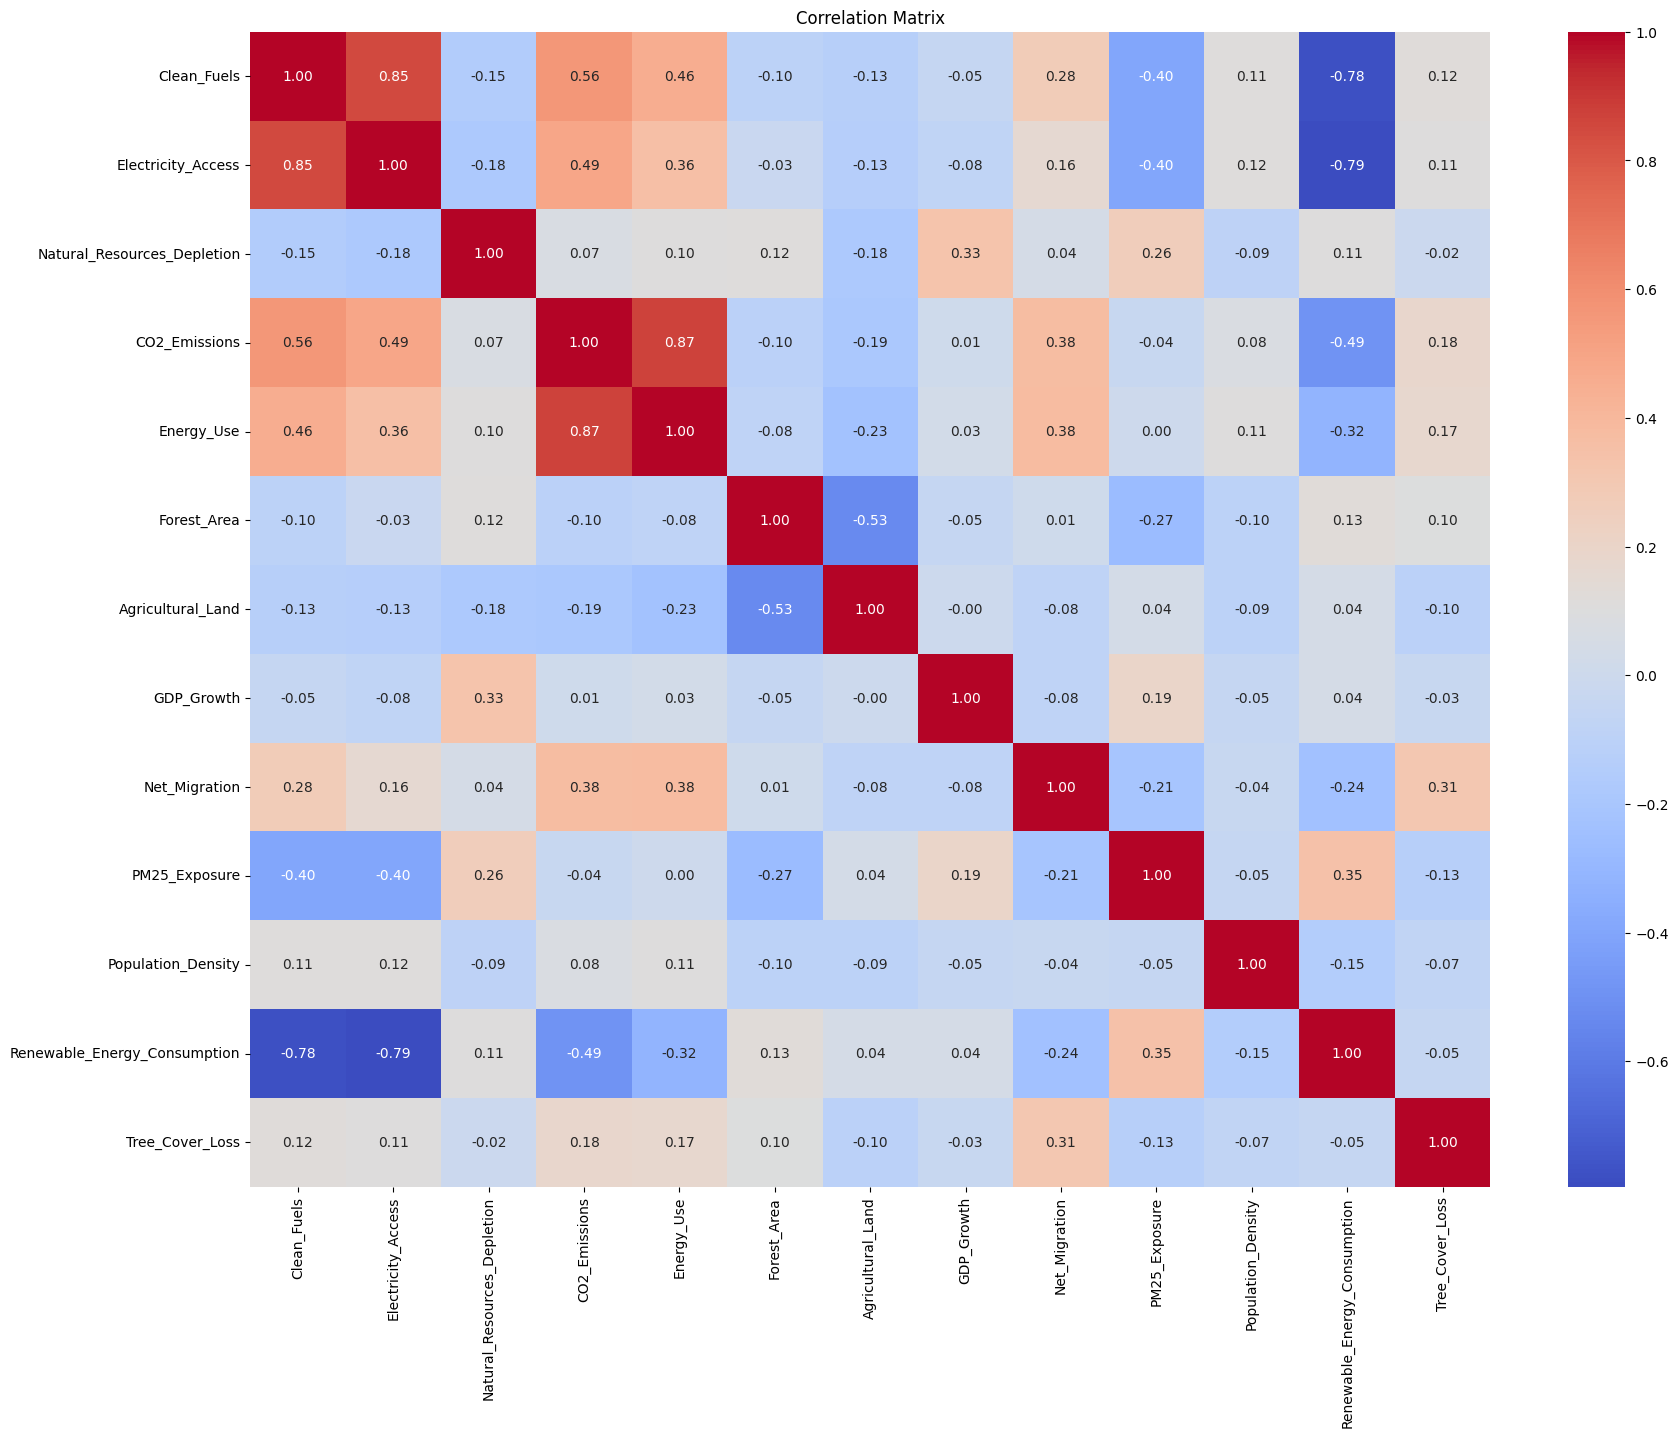

In [44]:
plt.figure(figsize=(20, 15))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### __*Scatter matrix heatmap*__

<Figure size 2000x2000 with 0 Axes>

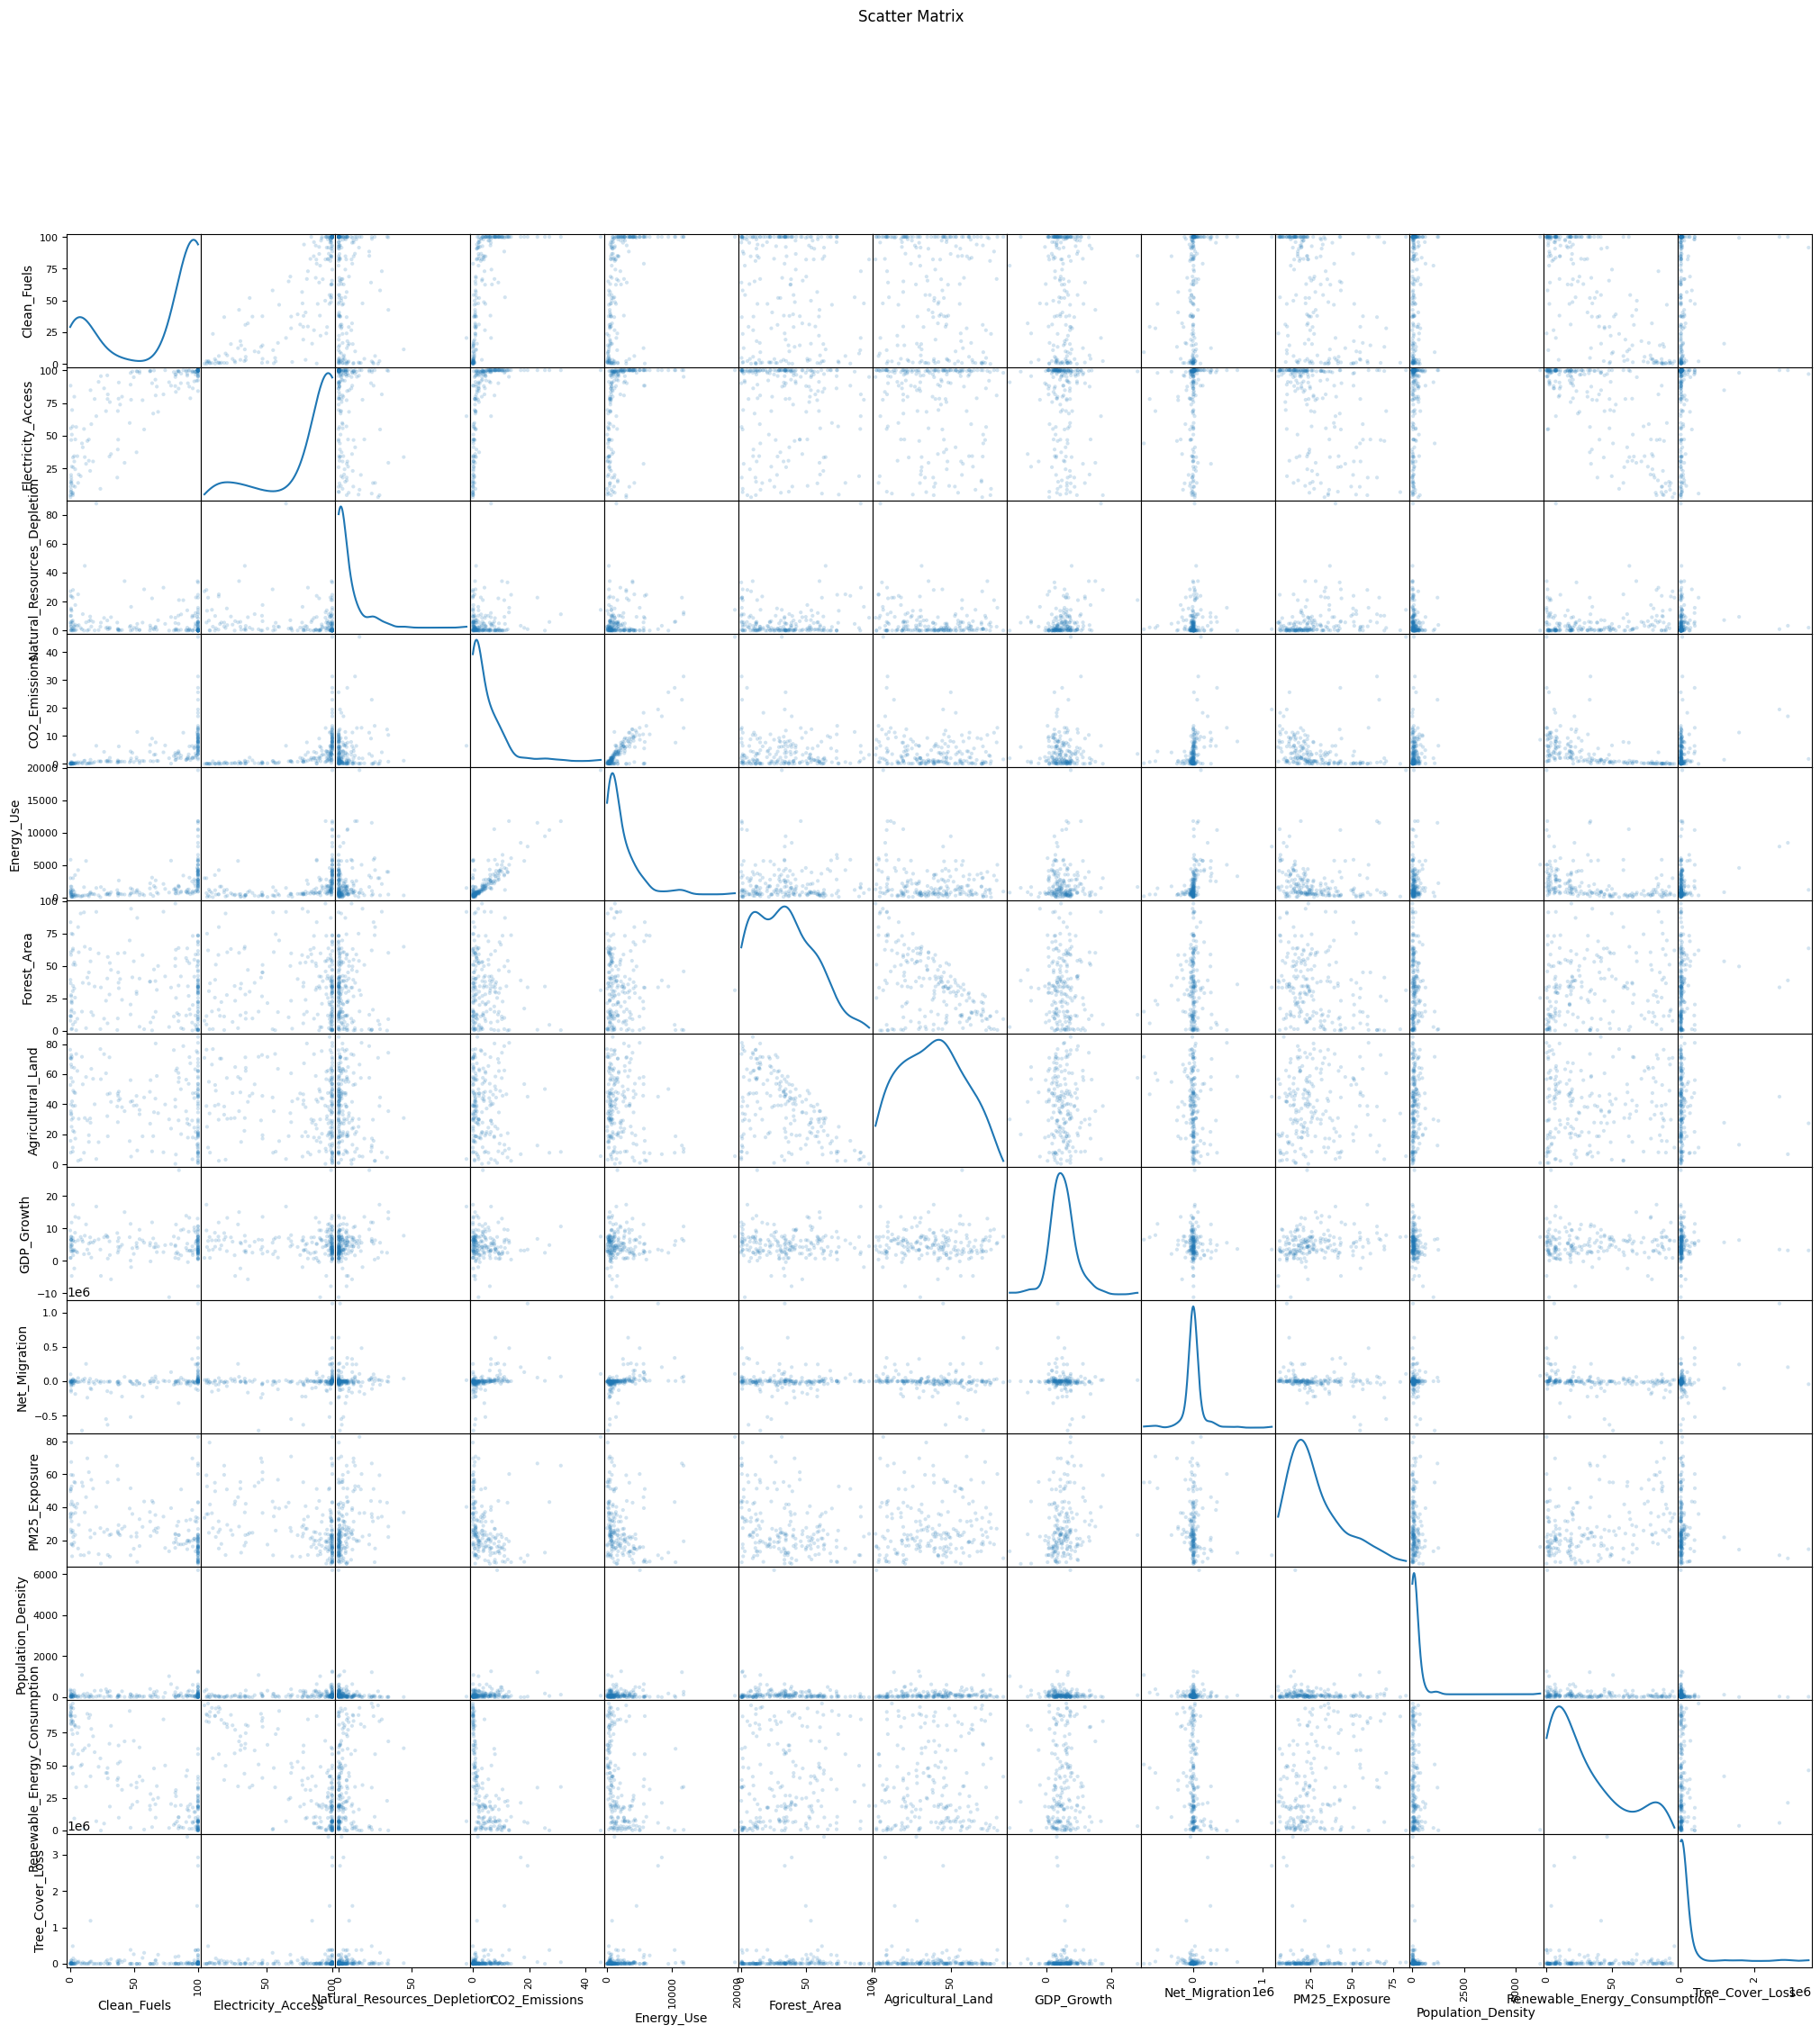

In [45]:
plt.figure(figsize=(20, 20))
scatter_matrix(df1, alpha=0.2, figsize=(25, 25), diagonal='kde')
plt.suptitle('Scatter Matrix')
plt.savefig('scatter_matrix.png')
plt.show()

#### __*Residual Plots*__

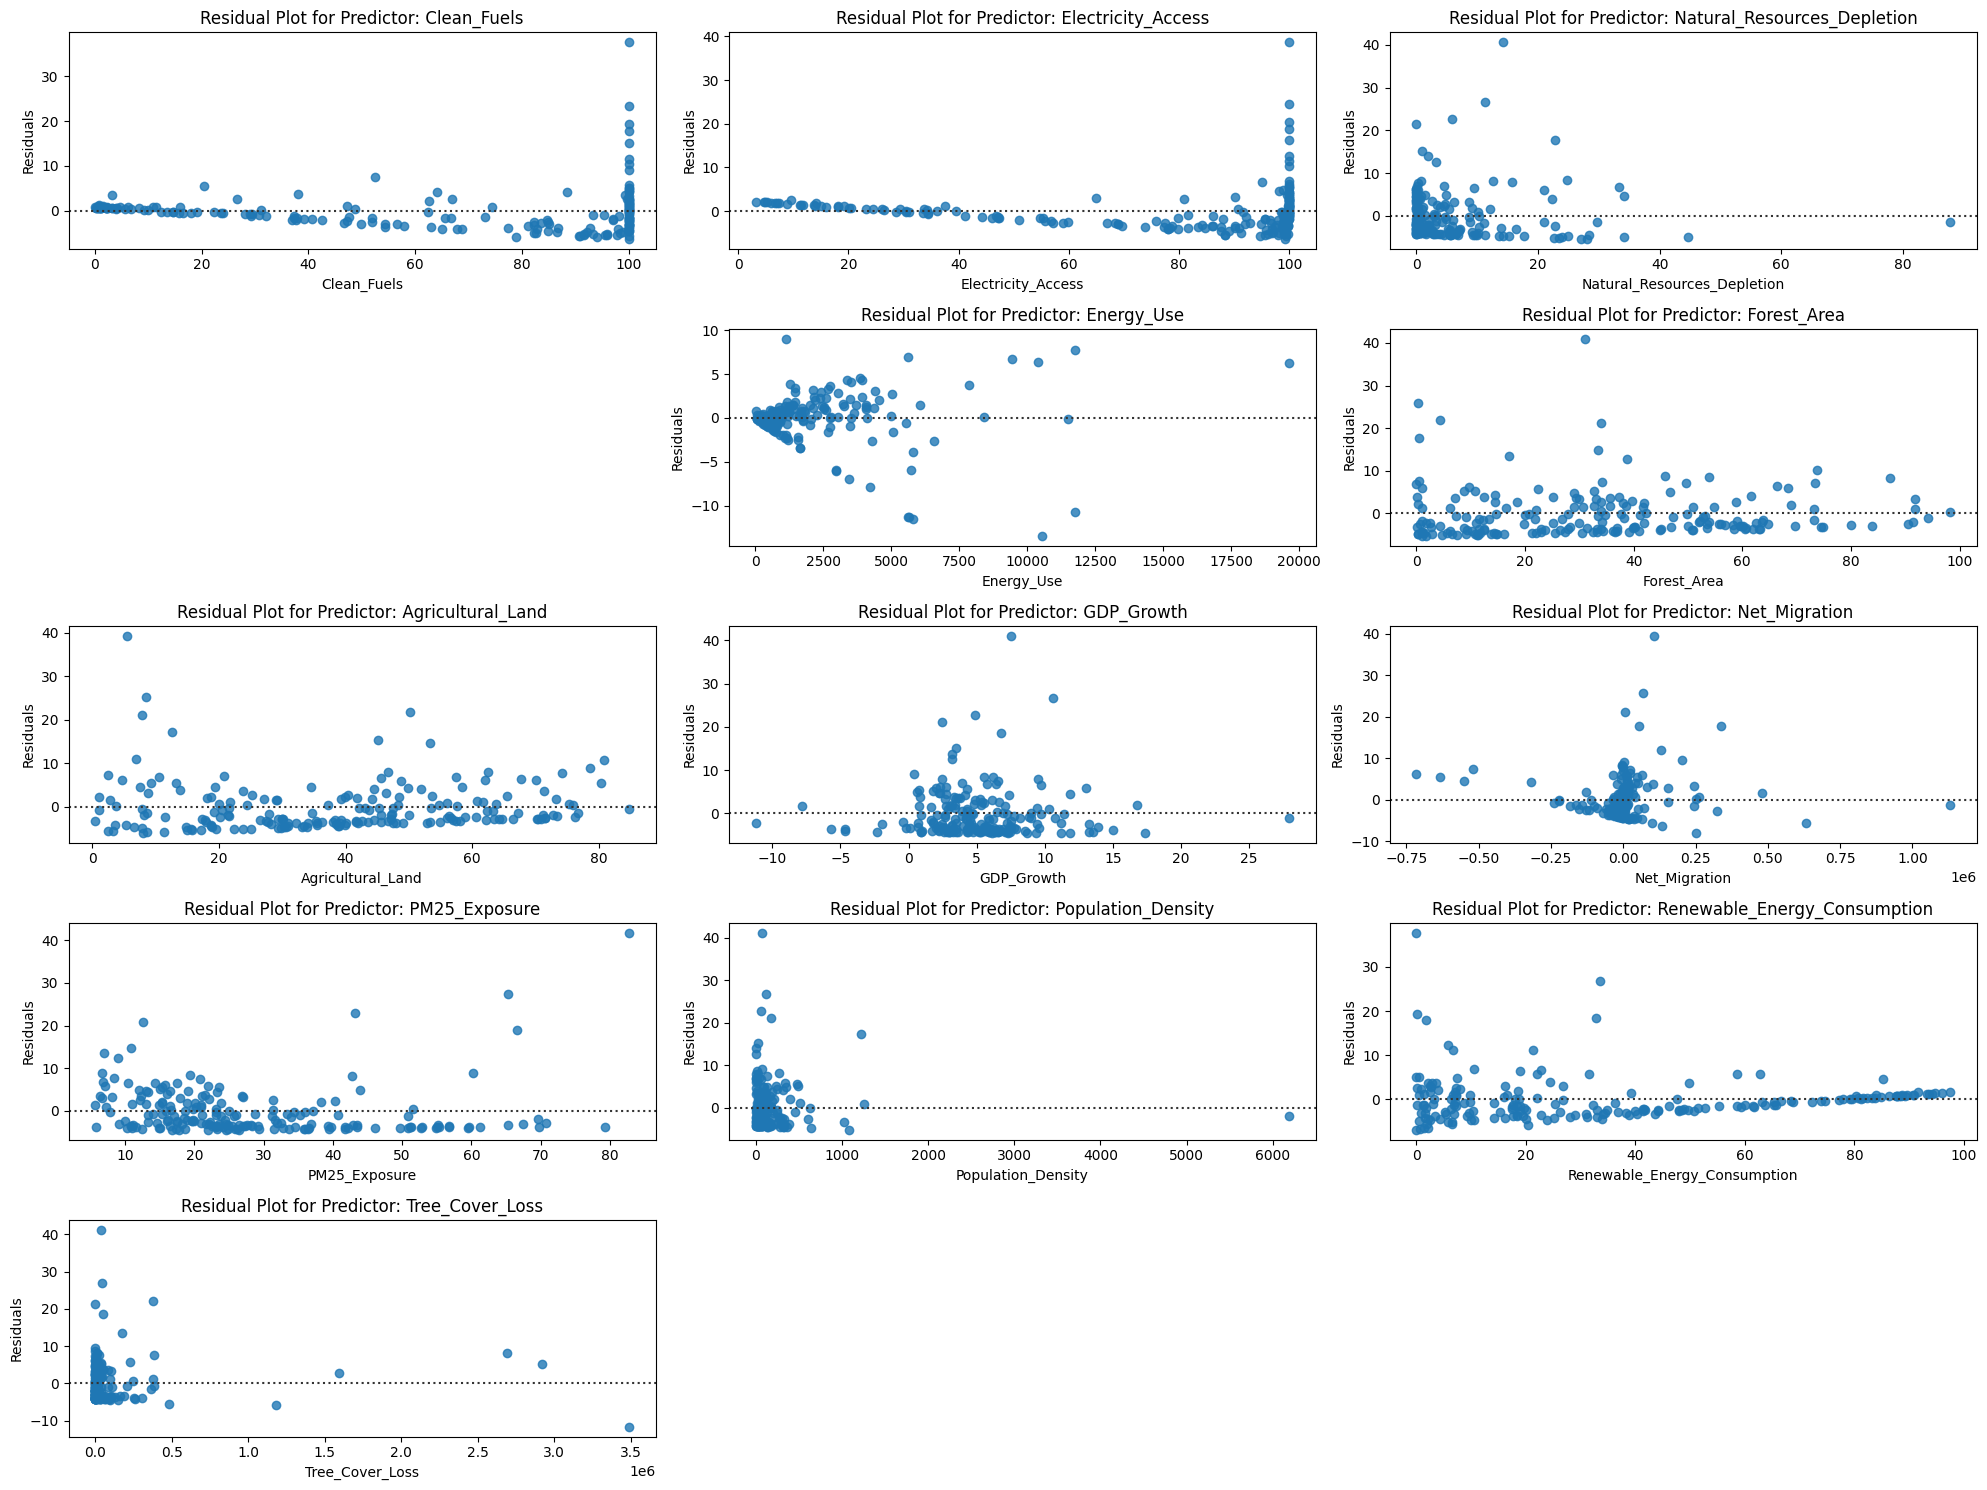

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
n_cols = 3 
n_rows = (len(df1.columns) - 1) // n_cols + 1  #
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()
for i, b in enumerate(df1.columns):
    if b != 'CO2_Emissions':
        sns.residplot(x=b, y="CO2_Emissions", data=df1, ax=axes[i])
        axes[i].set_title(f"Residual Plot for Predictor: {b}")
        axes[i].set_xlabel(b)
        axes[i].set_ylabel("Residuals")
    else:
        axes[i].axis('off')
for j in range(i+1, len(axes)):  
    axes[j].axis('off')
plt.tight_layout()
plt.savefig('residual_plot.png')
plt.show()

> Residual plots indicate heteroscedasticity

### __5. Visualization to check Linearity__

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
rig_model = ols("CO2_Emissions ~ Clean_Fuels + Electricity_Access + Natural_Resources_Depletion + Energy_Use + Forest_Area + Agricultural_Land + GDP_Growth + Net_Migration + PM25_Exposure + Population_Density + Renewable_Energy_Consumption + Tree_Cover_Loss", data = df1).fit()
rig_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     67.06
Date:                Sat, 28 Dec 2024   Prob (F-statistic):           1.88e-59
Time:                        19:03:06   Log-Likelihood:                -449.24
No. Observations:                 191   AIC:                             924.5
Df Residuals:                     178   BIC:                             966.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.3519      1.582     -0.222      0.824      -3.474       2.770
Clean_Fuels                      0.0101      0.010      0.966      0.336      -0.011       0.031
Electricity_Access               0.0092      0.013      0.717      0.474      -0.016       0.035
Natural_Resources_Depletion      0.0095      0.022      0.443      0.658      -0.033       0.052
Energy_Use                       0.0017   9.19e-05     18.839      0.000       0.002       0.002
Forest_Area                      0.0036      0.011      0.338      0.736      -0.018       0.025
Agricultural_Land                0.0054      0.012      0.467      0.641      -0.017       0.028
GDP_Growth                      -0.0313      0.049     -0.640      0.523      -0.128       0.065
Net_Migration                 8.687e-07   1.45e-06      0.598      0.551      -2e-06    3.74e-06
PM25_Exposure                    0.0289      0.015      1.930      0.055      -0.001       0.059
Population_Density              -0.0004      0.000     -0.968      0.334      -0.001       0.000
Renewable_Energy_Consumption    -0.0355      0.011     -3.132      0.002      -0.058      -0.013
Tree_Cover_Loss               3.961e-07   5.03e-07      0.787      0.432   -5.97e-07    1.39e-06
==============================================================================
Omnibus:                       56.835   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              386.800
Skew:                          -0.897   Prob(JB):                     1.02e-84
Kurtosis:                       9.737   Cond. No.                     3.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### __*Partial Regression Plot*__

C:\Users\ALEX\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\graphics\regressionplots.py:566: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.tight_layout()


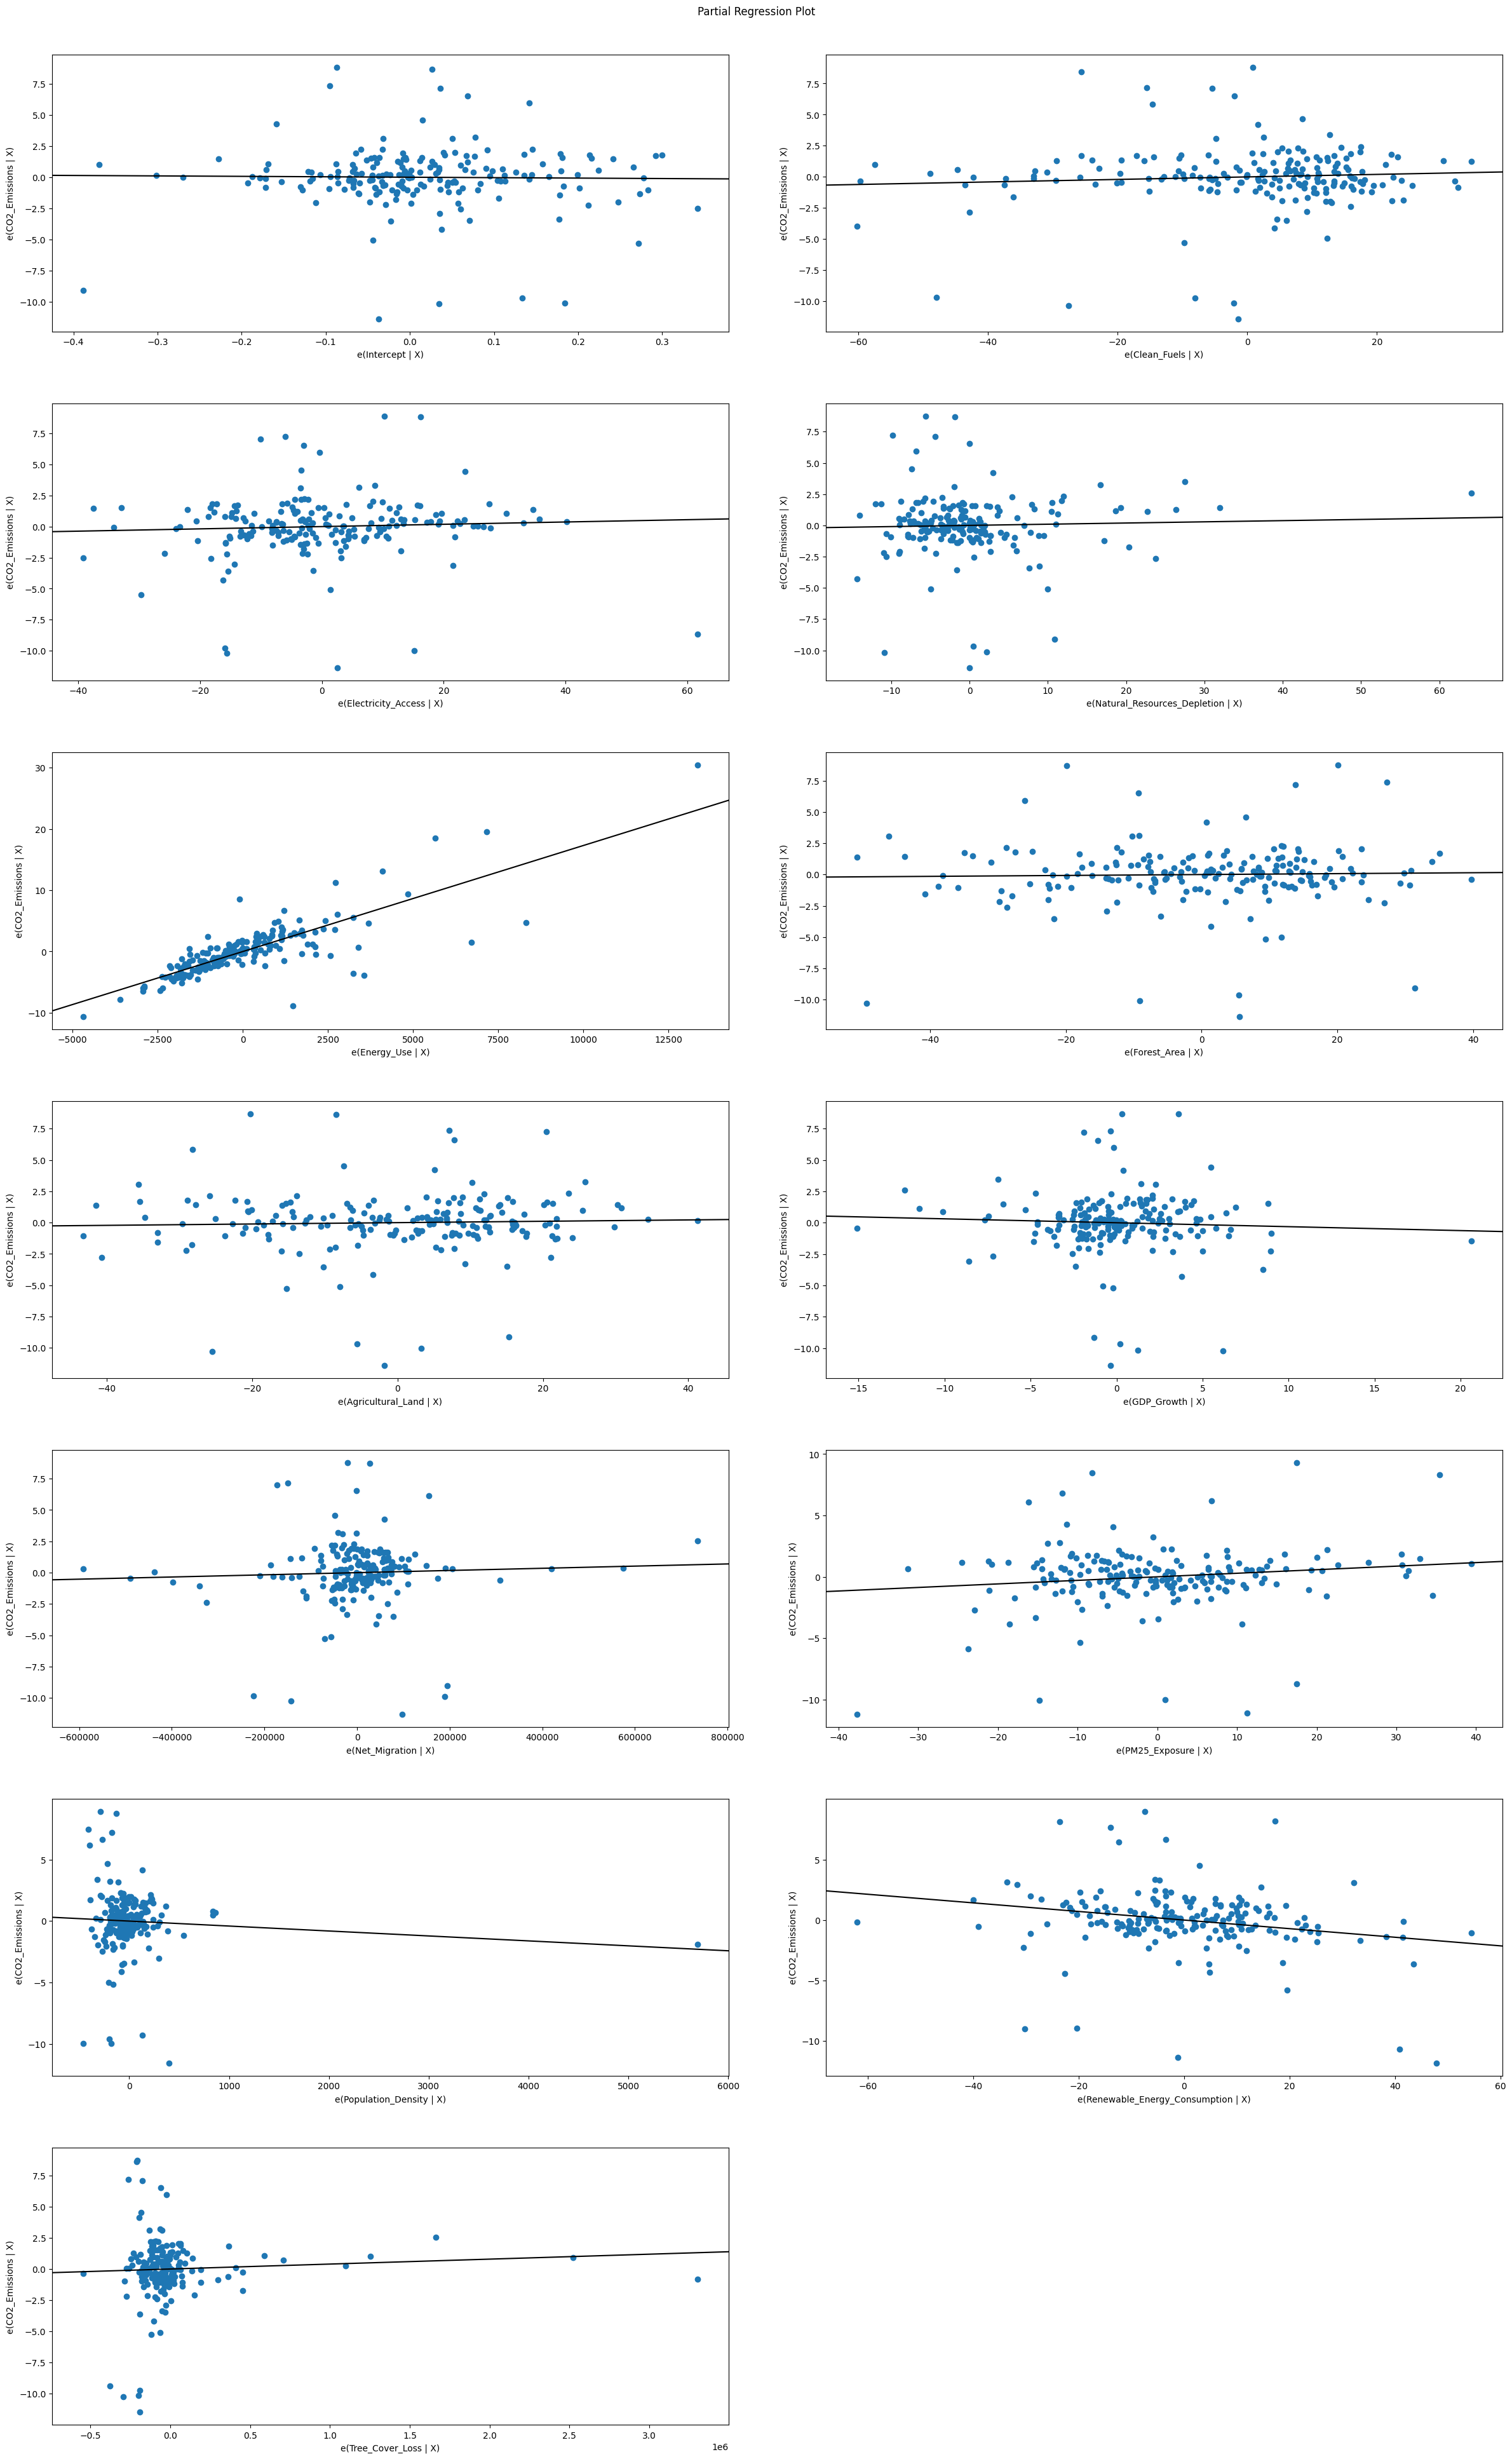

In [48]:
fig = sm.graphics.plot_partregress_grid(rig_model)
fig.set_size_inches(25, 40)
fig.tight_layout(pad=5.0)
plt.savefig('par_reg.png')

__Overall Interpretation:__

The partial regression plots provide a visual representation of the relationship between the dependent variable (CO2 Emissions) and each independent variable, while controlling for the effects of other independent variables in the model.

__Key Observations:__

1. Electricity Access: There appears to be a positive and moderately strong linear relationship.

2. Natural Resources Depletion: Similarly, the plot for Natural Resources Depletion suggests a weak relationship with CO2 Emissions after adjusting for other variables. 

3. Energy Use: This plot shows a positive and moderately strong linear relationship. As Energy Use increases, CO2 Emissions tend to increase as well.

4. PM25 Exposure: The relationship between PM25 Exposure and CO2 Emissions seems to be moderately strong.

5. Renewable Energy Consumption: There appears to be a positive and moderately strong linear relationship between Renewable Energy Consumption and CO2 Emissions. However, the relationship is weaker than that observed with Energy Use.

6. Clean Fuels: There appears to be a positive and moderately strong linear relationship.

#### __*CCPR PLOT*__

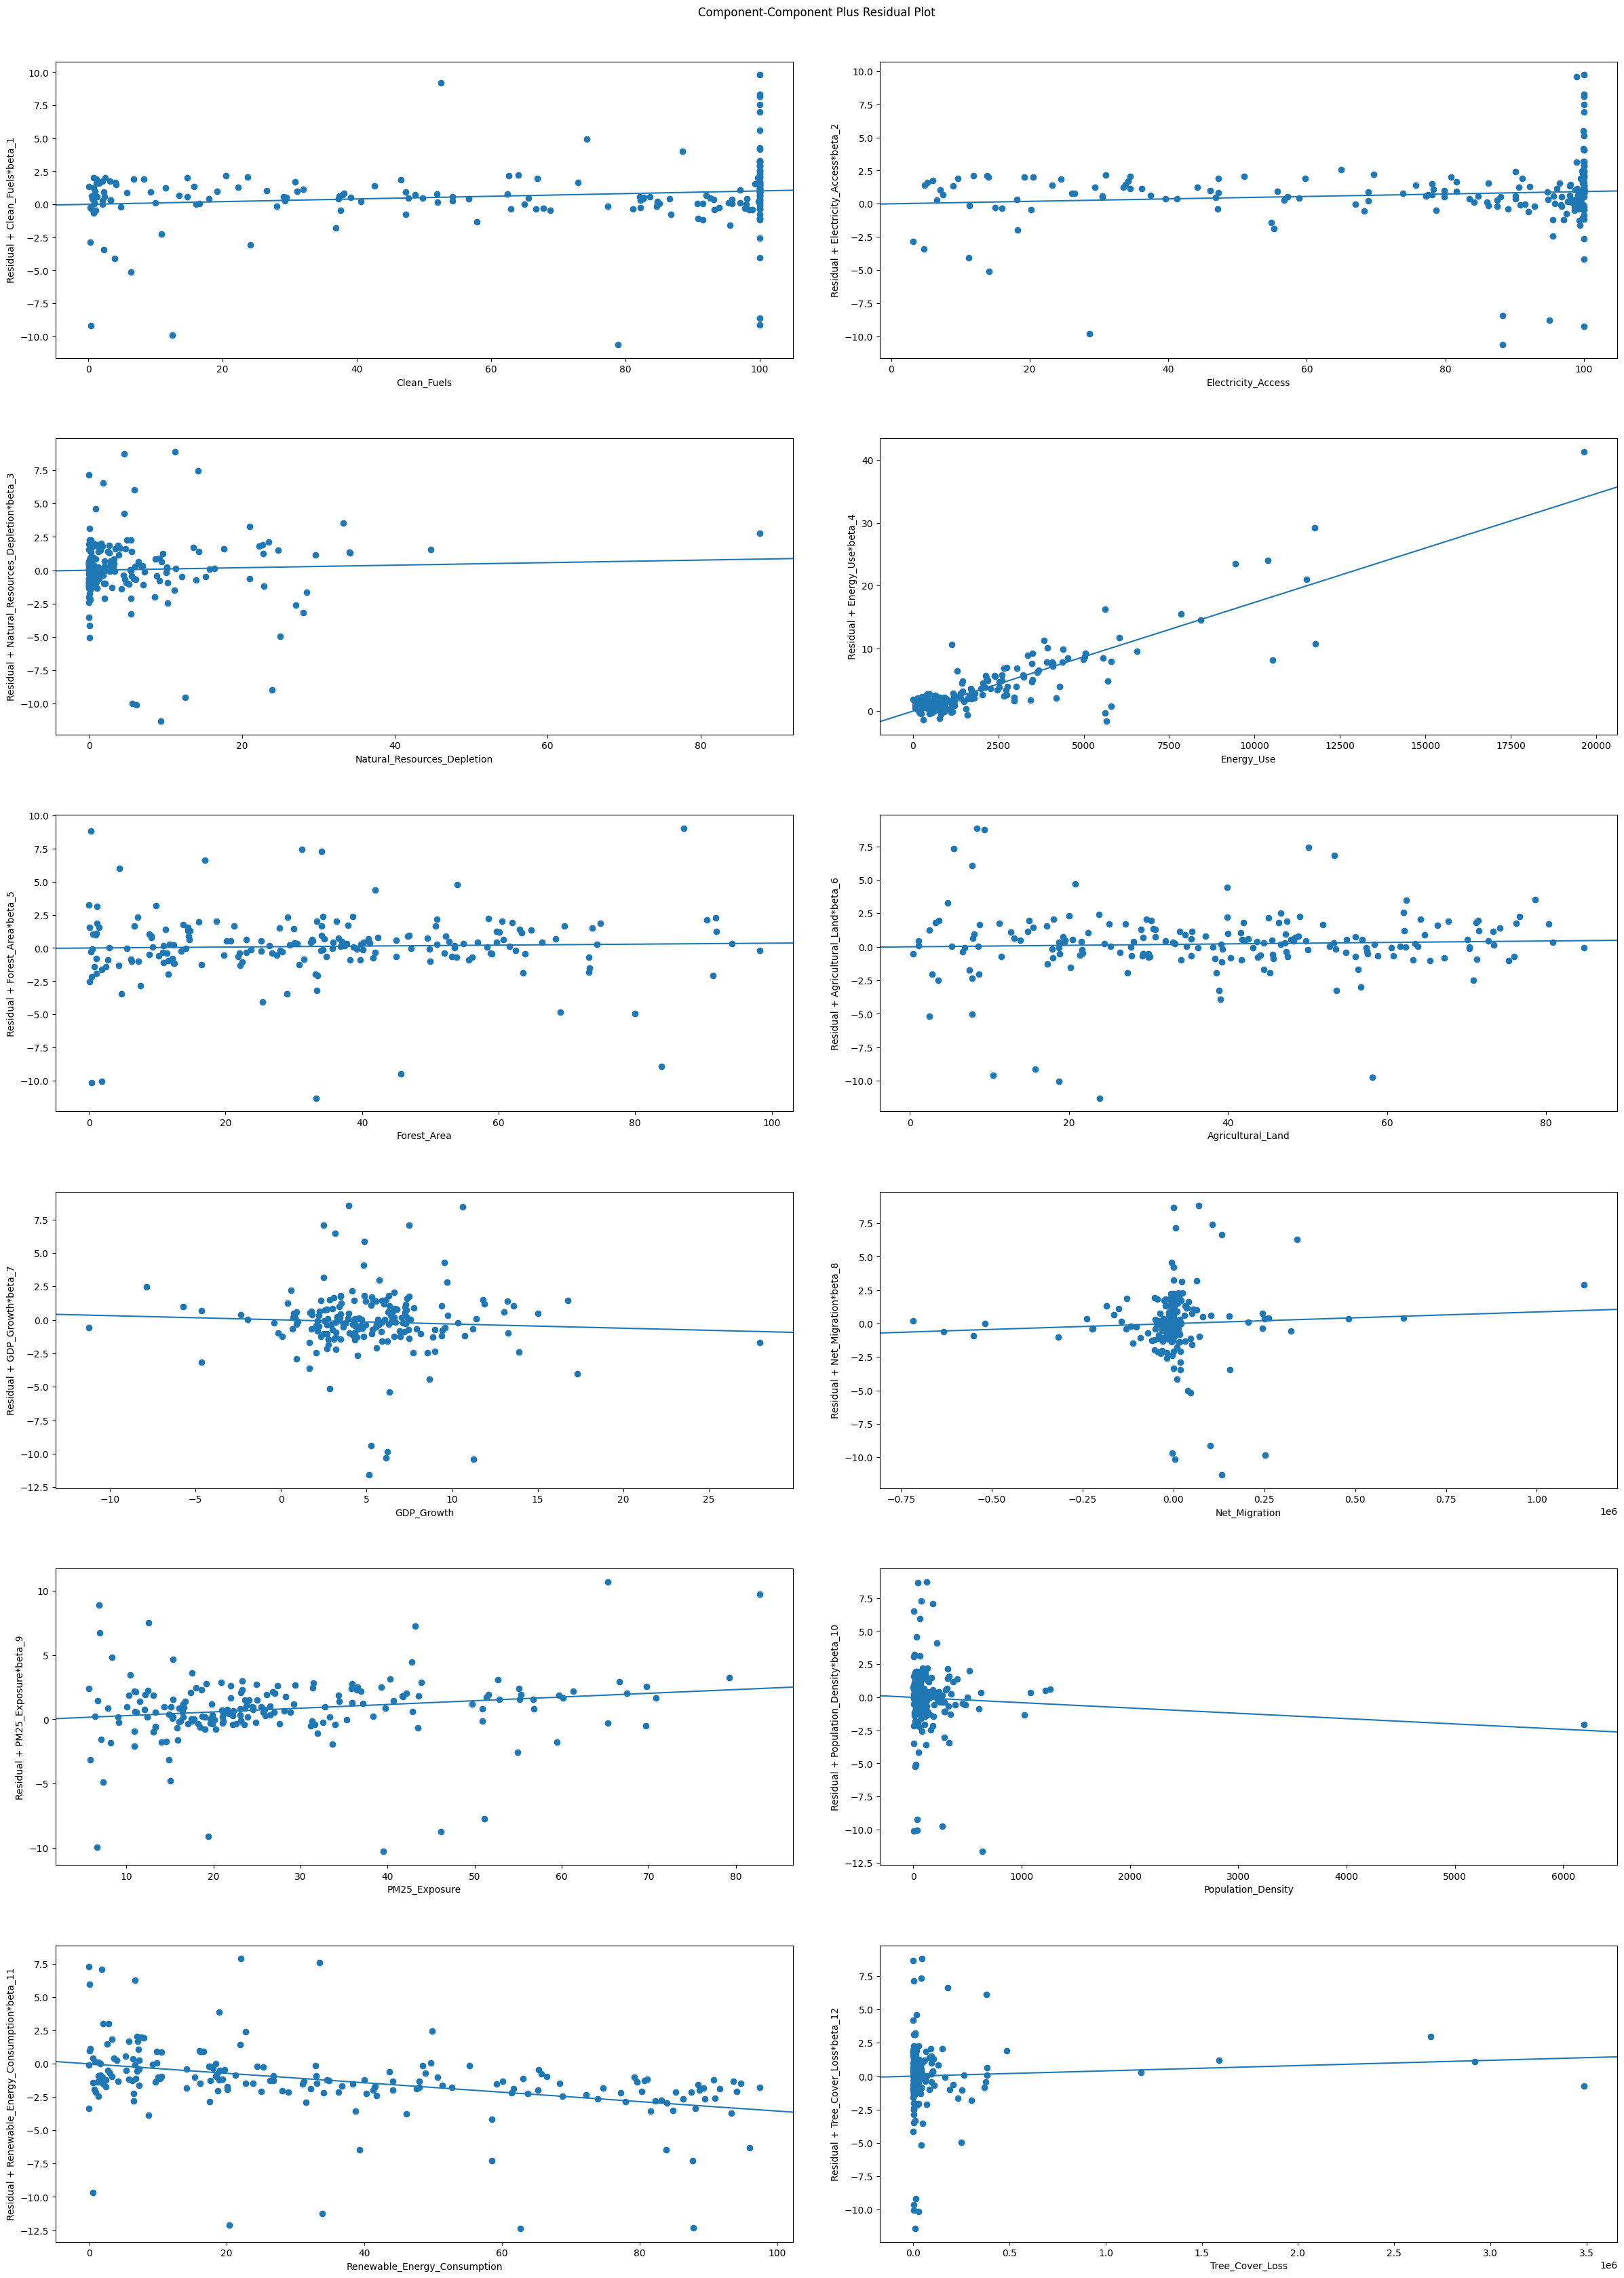

In [49]:
fig = sm.graphics.plot_ccpr_grid(rig_model)
fig.set_size_inches(25, 40)
fig.tight_layout(pad=5.0)
plt.savefig('ccpr.png')

## __6. CHECKING FOR NORMALITY__
### __QQ-Plot__

Finding Studentized Residuals

In [50]:
predictions = rig_model.predict()
residuals = df1['CO2_Emissions']-predictions
residuals
student_resid = rig_model.outlier_test().student_resid
student_resid

0     -4.192326
1     -0.143271
2     -0.549304
3      0.590847
4      0.384703
         ...   
186    0.043042
187    0.102703
188   -0.764528
189    0.448951
190    0.314315
Name: student_resid, Length: 191, dtype: float64

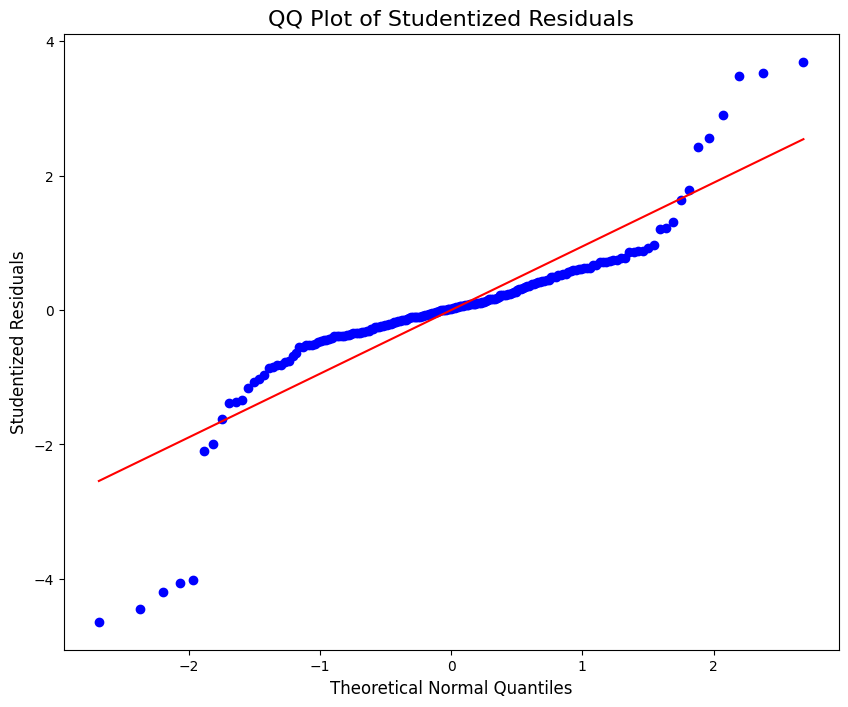

In [51]:
import scipy.stats as stats
plt.figure(figsize=(10, 8))  
stats.probplot(student_resid, dist="norm", plot=plt)
plt.title("QQ Plot of Studentized Residuals", fontsize=16)  
plt.xlabel("Theoretical Normal Quantiles", fontsize=12)  
plt.ylabel("Studentized Residuals", fontsize=12)
plt.savefig('qq.png')

> The Q-Q plot  suggests that our response variable is heavily skewed or contains extreme outliers. This is why the data points deviate significantly from the 45-degree line, especially for larger values.
> This implies data might not be normal.
> Data contains extreme Outliers.
> Data is affected by very high numeric values.

### **Checking for outliers**

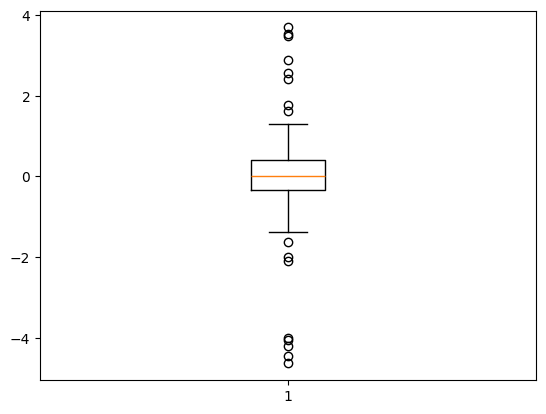

In [52]:
bp = plt.boxplot(student_resid, notch=None, vert=None, patch_artist=None, widths=None) 
plt.savefig('bx_plt.png')
plt.show()

> box plot indicated extreme outliers

## __TEST fOR NORMALITY__

#### __Kolmogorov-Smirnov Test:__

In [53]:
from scipy.stats import kstest
residuals = rig_model.resid
kstest(df1['CO2_Emissions'], 'norm')

KstestResult(statistic=np.float64(0.5241632930194544), pvalue=np.float64(2.1199040358203625e-49), statistic_location=np.float64(1.95022041334248), statistic_sign=np.int8(-1))

RESULT:
Since the **p-value** $ < .05 $, we reject the null hypothesis of the Kolmogorov-Smirnov test.
This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

#### __Shapiro-Wilk Test:__

In [54]:
from scipy.stats import shapiro
shapiro(df1['CO2_Emissions'])

ShapiroResult(statistic=np.float64(0.6923720572871666), pvalue=np.float64(1.7903675360224968e-18))

RESULT:
From the output we can see that the test statistic is 0.6923720572871666
 and the corresponding p-value is 1.7903675360224968e-18
 (extremely close to zero). This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

Since normality is rejected under both the Shapiro-Wilk test and the Kolmogorov-Smirnov (KS) test, it is evident that the response variable deviates significantly from a normal distribution. Therefore, transforming the response variable is necessary to meet the normality assumption required for regression analysis.

### **Box-Cox Transformation**

Best Lambda Value

In [55]:
from scipy import stats 
fittedData, lambdaValue = stats.boxcox(df1['CO2_Emissions'])
lambdaValue

np.float64(0.1577282778774602)

In [56]:
df1['transformed_CO2_Emissions'] = fittedData
df2 = df1.drop(['CO2_Emissions'],axis=1)
df2.head()

,Clean_Fuels,Electricity_Access,Natural_Resources_Depletion,Energy_Use,Forest_Area,Agricultural_Land,GDP_Growth,Net_Migration,PM25_Exposure,Population_Density,Renewable_Energy_Consumption,Tree_Cover_Loss,transformed_CO2_Emissions
0,12.5,28.669672,5.640907,5618.169063,1.852782,58.134400,11.229715,252185,46.151929,37.427274,33.88,236.0,-2.080256
1,52.0,99.371124,0.449098,719.584378,28.309672,39.306569,5.526424,-50855,22.169490,109.908285,36.77,695.0,0.315134
2,98.4,98.614319,22.883929,983.682160,0.734127,17.302896,5.900000,-111256,34.001852,13.837232,0.58,4470.0,1.142067
3,100.0,100.000000,4.747533,2385.144571,34.042553,46.382979,5.397796,2467,12.178288,169.842553,16.61,2.0,2.317147
4,42.6,29.448309,34.127119,433.185634,60.105322,35.439961,15.030000,64009,28.316361,15.601956,68.38,93435.0,-0.203829


In [57]:
rig_model1 = ols("transformed_CO2_Emissions ~ Clean_Fuels + Electricity_Access + Natural_Resources_Depletion + Energy_Use + Forest_Area + Agricultural_Land + GDP_Growth + Net_Migration + PM25_Exposure + Population_Density + Renewable_Energy_Consumption + Tree_Cover_Loss", data = df2).fit()
residuals1 = rig_model1.resid
rig_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     transformed_CO2_Emissions   R-squared:                       0.864
Model:                                   OLS   Adj. R-squared:                  0.854
Method:                        Least Squares   F-statistic:                     93.85
Date:                       Sat, 28 Dec 2024   Prob (F-statistic):           2.79e-70
Time:                               19:03:20   Log-Likelihood:                -184.69
No. Observations:                        191   AIC:                             395.4
Df Residuals:                            178   BIC:                             437.7
Df Model:                                 12                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.0059      0.396     -2.540      0.012      -1.787      -0.224
Clean_Fuels                      0.0108      0.003      4.105      0.000       0.006       0.016
Electricity_Access               0.0141      0.003      4.389      0.000       0.008       0.020
Natural_Resources_Depletion      0.0140      0.005      2.606      0.010       0.003       0.025
Energy_Use                       0.0002    2.3e-05      9.492      0.000       0.000       0.000
Forest_Area                      0.0042      0.003      1.562      0.120      -0.001       0.010
Agricultural_Land                0.0029      0.003      0.985      0.326      -0.003       0.009
GDP_Growth                      -0.0095      0.012     -0.778      0.437      -0.034       0.015
Net_Migration                 5.358e-08   3.64e-07      0.147      0.883   -6.64e-07    7.71e-07
PM25_Exposure                   -0.0038      0.004     -1.012      0.313      -0.011       0.004
Population_Density           -5.488e-05      0.000     -0.527      0.599      -0.000       0.000
Renewable_Energy_Consumption    -0.0164      0.003     -5.780      0.000      -0.022      -0.011
Tree_Cover_Loss               3.921e-08   1.26e-07      0.311      0.756   -2.09e-07    2.88e-07
==============================================================================
Omnibus:                       79.202   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.922
Skew:                          -1.416   Prob(JB):                    4.58e-109
Kurtosis:                      10.394   Cond. No.                     3.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### __Kolmogorov-Smirnov Test__

In [58]:
kstest(residuals1, 'norm')

KstestResult(statistic=np.float64(0.17275908574133308), pvalue=np.float64(1.8691338246169197e-05), statistic_location=np.float64(-0.6379155686029209), statistic_sign=np.int8(-1))

#### __Shapiro-Wilk Test__

In [59]:
shapiro(residuals1)

ShapiroResult(statistic=np.float64(0.914471664016493), pvalue=np.float64(4.382253598317062e-09))

Observation:
Despite applying the Box-Cox transformation to the response, normality was rejected under both the Shapiro-Wilk test (p-value < 0.05) and the Kolmogorov-Smirnov (KS) test (p-value < 0.05). This indicates that the transformed data still significantly deviates from a normal distribution.

### **Log Transformation**

In [60]:
df3 = df1.copy()
df3['log_CO2_Emissions'] = np.log(df1['CO2_Emissions'])
df3.drop(['CO2_Emissions','transformed_CO2_Emissions'],axis=1,inplace=True)
df3.head()

,Clean_Fuels,Electricity_Access,Natural_Resources_Depletion,Energy_Use,Forest_Area,Agricultural_Land,GDP_Growth,Net_Migration,PM25_Exposure,Population_Density,Renewable_Energy_Consumption,Tree_Cover_Loss,log_CO2_Emissions
0,12.5,28.669672,5.640907,5618.169063,1.852782,58.134400,11.229715,252185,46.151929,37.427274,33.88,236.0,-2.521225
1,52.0,99.371124,0.449098,719.584378,28.309672,39.306569,5.526424,-50855,22.169490,109.908285,36.77,695.0,0.307552
2,98.4,98.614319,22.883929,983.682160,0.734127,17.302896,5.900000,-111256,34.001852,13.837232,0.58,4470.0,1.050096
3,100.0,100.000000,4.747533,2385.144571,34.042553,46.382979,5.397796,2467,12.178288,169.842553,16.61,2.0,1.974952
4,42.6,29.448309,34.127119,433.185634,60.105322,35.439961,15.030000,64009,28.316361,15.601956,68.38,93435.0,-0.207178


In [61]:
rig_model2 = ols("log_CO2_Emissions ~ Clean_Fuels + Electricity_Access + Natural_Resources_Depletion + Energy_Use + Forest_Area + Agricultural_Land + GDP_Growth + Net_Migration + PM25_Exposure + Population_Density + Renewable_Energy_Consumption + Tree_Cover_Loss ", data = df3).fit()
residuals2 = rig_model2.resid
rig_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_CO2_Emissions   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     91.67
Date:                Sat, 28 Dec 2024   Prob (F-statistic):           1.67e-69
Time:                        19:03:20   Log-Likelihood:                -176.64
No. Observations:                 191   AIC:                             379.3
Df Residuals:                     178   BIC:                             421.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.2142      0.380     -3.198      0.002      -1.963      -0.465
Clean_Fuels                      0.0097      0.003      3.865      0.000       0.005       0.015
Electricity_Access               0.0167      0.003      5.402      0.000       0.011       0.023
Natural_Resources_Depletion      0.0125      0.005      2.431      0.016       0.002       0.023
Energy_Use                       0.0001   2.21e-05      6.527      0.000       0.000       0.000
Forest_Area                      0.0051      0.003      1.965      0.051   -2.08e-05       0.010
Agricultural_Land                0.0024      0.003      0.870      0.385      -0.003       0.008
GDP_Growth                      -0.0084      0.012     -0.718      0.474      -0.032       0.015
Net_Migration                -7.861e-08   3.49e-07     -0.225      0.822   -7.67e-07    6.09e-07
PM25_Exposure                   -0.0037      0.004     -1.030      0.304      -0.011       0.003
Population_Density           -6.222e-05   9.97e-05     -0.624      0.534      -0.000       0.000
Renewable_Energy_Consumption    -0.0168      0.003     -6.190      0.000      -0.022      -0.011
Tree_Cover_Loss               3.023e-08   1.21e-07      0.250      0.803   -2.08e-07    2.69e-07
==============================================================================
Omnibus:                       77.174   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.627
Skew:                          -1.378   Prob(JB):                    3.18e-104
Kurtosis:                      10.231   Cond. No.                     3.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### __Shapiro-Wilk Test__

In [62]:
shapiro(residuals2)

ShapiroResult(statistic=np.float64(0.9139616655261711), pvalue=np.float64(4.041892074694679e-09))

#### __Kolmogorov-Smirnov Test__

In [63]:
kstest(residuals2, 'norm')

KstestResult(statistic=np.float64(0.18704043394081837), pvalue=np.float64(2.531244652719874e-06), statistic_location=np.float64(-0.5180156359580612), statistic_sign=np.int8(-1))

Observation:
The log transformation applied to the response did not successfully achieve normality, as indicated by the rejection of normality under both the Shapiro-Wilk test (p-value < 0.05) and the Kolmogorov-Smirnov (KS) test (p-value < 0.05). This suggests that the log-transformed data still significantly deviates from a normal distribution.

### **Standard Scaler**

In [64]:
df4 = df1.copy()
df4['scaled_CO2_Emissions'] = (df1['CO2_Emissions'] - df1['CO2_Emissions'].mean())/np.sqrt(df1['CO2_Emissions']).var()
df4.drop(['CO2_Emissions','transformed_CO2_Emissions'],axis=1,inplace = True)
df4.head()

,Clean_Fuels,Electricity_Access,Natural_Resources_Depletion,Energy_Use,Forest_Area,Agricultural_Land,GDP_Growth,Net_Migration,PM25_Exposure,Population_Density,Renewable_Energy_Consumption,Tree_Cover_Loss,scaled_CO2_Emissions
0,12.5,28.669672,5.640907,5618.169063,1.852782,58.134400,11.229715,252185,46.151929,37.427274,33.88,236.0,-3.037129
1,52.0,99.371124,0.449098,719.584378,28.309672,39.306569,5.526424,-50855,22.169490,109.908285,36.77,695.0,-2.150332
2,98.4,98.614319,22.883929,983.682160,0.734127,17.302896,5.900000,-111256,34.001852,13.837232,0.58,4470.0,-1.112399
3,100.0,100.000000,4.747533,2385.144571,34.042553,46.382979,5.397796,2467,12.178288,169.842553,16.61,2.0,1.900812
4,42.6,29.448309,34.127119,433.185634,60.105322,35.439961,15.030000,64009,28.316361,15.601956,68.38,93435.0,-2.529529


In [65]:
rig_model3 = ols("scaled_CO2_Emissions ~ Clean_Fuels + Electricity_Access + Natural_Resources_Depletion + Energy_Use + Forest_Area + Agricultural_Land + GDP_Growth + Net_Migration + PM25_Exposure + Population_Density + Renewable_Energy_Consumption + Tree_Cover_Loss ", data = df4).fit()
residuals3 = rig_model3.resid
rig_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     scaled_CO2_Emissions   R-squared:                       0.819
Model:                              OLS   Adj. R-squared:                  0.807
Method:                   Least Squares   F-statistic:                     67.06
Date:                  Sat, 28 Dec 2024   Prob (F-statistic):           1.88e-59
Time:                          19:03:20   Log-Likelihood:                -379.18
No. Observations:                   191   AIC:                             784.4
Df Residuals:                       178   BIC:                             826.6
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -3.3367      1.096     -3.043      0.003      -5.500      -1.173
Clean_Fuels                      0.0070      0.007      0.966      0.336      -0.007       0.021
Electricity_Access               0.0064      0.009      0.717      0.474      -0.011       0.024
Natural_Resources_Depletion      0.0066      0.015      0.443      0.658      -0.023       0.036
Energy_Use                       0.0012   6.37e-05     18.839      0.000       0.001       0.001
Forest_Area                      0.0025      0.007      0.338      0.736      -0.012       0.017
Agricultural_Land                0.0038      0.008      0.467      0.641      -0.012       0.020
GDP_Growth                      -0.0217      0.034     -0.640      0.523      -0.088       0.045
Net_Migration                  6.02e-07   1.01e-06      0.598      0.551   -1.39e-06    2.59e-06
PM25_Exposure                    0.0200      0.010      1.930      0.055      -0.000       0.041
Population_Density              -0.0003      0.000     -0.968      0.334      -0.001       0.000
Renewable_Energy_Consumption    -0.0246      0.008     -3.132      0.002      -0.040      -0.009
Tree_Cover_Loss               2.745e-07   3.49e-07      0.787      0.432   -4.14e-07    9.63e-07
==============================================================================
Omnibus:                       56.835   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              386.800
Skew:                          -0.897   Prob(JB):                     1.02e-84
Kurtosis:                       9.737   Cond. No.                     3.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### __Shapiro-Wilk Test__

In [66]:
shapiro(residuals3)

ShapiroResult(statistic=np.float64(0.8201659316742531), pvalue=np.float64(4.358087868823173e-14))

#### __Kolmogorov-Smirnov Test__

In [67]:
kstest(residuals3, 'norm')

KstestResult(statistic=np.float64(0.055400044659275866), pvalue=np.float64(0.5813879702589326), statistic_location=np.float64(-0.7106643828180638), statistic_sign=np.int8(-1))

Observation:
Under the standard scaler transformation of the response variable, the results of the normality tests are inconsistent. Normality is rejected based on the Shapiro-Wilk test (p-value < 0.05), indicating that the data significantly deviates from a normal distribution. However, normality is accepted under the Kolmogorov-Smirnov (KS) test (p-value > 0.05). This discrepancy suggests that the data's adherence to normality may be sensitive to the test applied, and further investigation or additional transformations may be necessary to achieve consistent results. Therefore proceeding with the standard scaler transformation of the response variable.

## __7. TEST FOR HETEROSCEDASTICITY__ 
**Breusch-Pagan and White tests**

In [70]:
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd

In [71]:
# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(rig_model3.resid, rig_model3.model.exog)

# Labels for the test results
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

# Create a DataFrame for the table
bp_table = pd.DataFrame({
    'Metric': labels,
    'Value': bp_test
})
bp_table

,Metric,Value
0,LM Statistic,7.837784e+01
1,LM-Test p-value,8.406992e-12
2,F-Statistic,1.032305e+01
3,F-Test p-value,2.650518e-15


**Results**\
The Breusch-Pagan test and White test for heteroscedasticity have identified the presence of heteroscedasticity in the data, as indicated by significant p-values (p-value < 0.05) in both tests. This suggests that the variance of the residuals is not constant, violating one of the key assumptions of homoscedasticity in regression analysis. Appropriate remedial measures, such as transforming variables or using robust standard errors, may be required to address this issue.

### **Yeo Johnson Transformation**

In [72]:
from sklearn.preprocessing import PowerTransformer

# Yeo-Johnson transformation
df5 = df4.copy()
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df5['yeo_johnson_transformed'] = pt.fit_transform(df5.loc[:,['scaled_CO2_Emissions']])
df5.drop(['scaled_CO2_Emissions'],axis=1,inplace = True)
df5.head()

,Clean_Fuels,Electricity_Access,Natural_Resources_Depletion,Energy_Use,Forest_Area,Agricultural_Land,GDP_Growth,Net_Migration,PM25_Exposure,Population_Density,Renewable_Energy_Consumption,Tree_Cover_Loss,yeo_johnson_transformed
0,12.5,28.669672,5.640907,5618.169063,1.852782,58.134400,11.229715,252185,46.151929,37.427274,33.88,236.0,-5.441167
1,52.0,99.371124,0.449098,719.584378,28.309672,39.306569,5.526424,-50855,22.169490,109.908285,36.77,695.0,-3.412541
2,98.4,98.614319,22.883929,983.682160,0.734127,17.302896,5.900000,-111256,34.001852,13.837232,0.58,4470.0,-1.473779
3,100.0,100.000000,4.747533,2385.144571,34.042553,46.382979,5.397796,2467,12.178288,169.842553,16.61,2.0,1.292558
4,42.6,29.448309,34.127119,433.185634,60.105322,35.439961,15.030000,64009,28.316361,15.601956,68.38,93435.0,-4.240200


In [73]:
rig_model4 = ols("yeo_johnson_transformed ~ Clean_Fuels + Electricity_Access + Natural_Resources_Depletion + Energy_Use + Forest_Area + Agricultural_Land + GDP_Growth + Net_Migration + PM25_Exposure + Population_Density + Renewable_Energy_Consumption + Tree_Cover_Loss ", data = df5).fit()
residuals4 = rig_model4.resid
rig_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     yeo_johnson_transformed   R-squared:                       0.834
Model:                                 OLS   Adj. R-squared:                  0.823
Method:                      Least Squares   F-statistic:                     74.79
Date:                     Sat, 28 Dec 2024   Prob (F-statistic):           6.72e-63
Time:                             19:03:21   Log-Likelihood:                -310.70
No. Observations:                      191   AIC:                             647.4
Df Residuals:                          178   BIC:                             689.7
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -4.6539      0.766     -6.076      0.000      -6.165      -3.142
Clean_Fuels                      0.0232      0.005      4.585      0.000       0.013       0.033
Electricity_Access               0.0141      0.006      2.260      0.025       0.002       0.026
Natural_Resources_Depletion      0.0280      0.010      2.690      0.008       0.007       0.049
Energy_Use                       0.0005   4.45e-05     10.936      0.000       0.000       0.001
Forest_Area                      0.0044      0.005      0.852      0.395      -0.006       0.015
Agricultural_Land                0.0066      0.006      1.182      0.239      -0.004       0.018
GDP_Growth                      -0.0113      0.024     -0.476      0.635      -0.058       0.035
Net_Migration                 5.571e-07   7.04e-07      0.792      0.429   -8.31e-07    1.95e-06
PM25_Exposure                   -0.0095      0.007     -1.304      0.194      -0.024       0.005
Population_Density           -1.524e-05      0.000     -0.076      0.940      -0.000       0.000
Renewable_Energy_Consumption    -0.0232      0.005     -4.220      0.000      -0.034      -0.012
Tree_Cover_Loss              -5.419e-08   2.44e-07     -0.222      0.824   -5.35e-07    4.27e-07
==============================================================================
Omnibus:                       37.628   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.616
Skew:                          -0.804   Prob(JB):                     1.92e-23
Kurtosis:                       6.250   Cond. No.                     3.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Breusch-Pagan and White test**

In [74]:
# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(rig_model4.resid, rig_model4.model.exog)

# Labels for the test results
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

# Create a DataFrame for the table
bp_table = pd.DataFrame({
    'Metric': labels,
    'Value': bp_test
})
bp_table

,Metric,Value
0,LM Statistic,15.341541
1,LM-Test p-value,0.223288
2,F-Statistic,1.295504
3,F-Test p-value,0.224539


**Results**\
Since the *p-value* $>0.05$
, we may accept the null hypothesis of the bresush-Pagan Test, hence there is no heteroscedasticity.

## __8. MODEL SELECTION__ 

We calculate the best n-1 subset model and compare their AIC and BIC scores, if it is lower than full model we choose the subset and continue this exercise if variables equal to one

##### Mallows Cp for full model:

In [75]:
from sklearn.metrics import mean_squared_error
p_subset = len(df5.columns)
n = len(df5["yeo_johnson_transformed"])
sigma_squared = mean_squared_error(df5["yeo_johnson_transformed"], rig_model4.predict(df5))
rss_full = np.sum((df5["yeo_johnson_transformed"] - rig_model4.predict(df5)) ** 2)
mallows_cp = (rss_full/ sigma_squared) + 2 * p_subset - n
mallows_cp

np.float64(26.0)

##### Mallows CP calculated for the regression model with 11 predictor variables:

In [76]:
from sklearn.linear_model import LinearRegression
import numpy as np
from itertools import combinations

# Define y and X
y = df5["yeo_johnson_transformed"]
X = df5.drop(["yeo_johnson_transformed"], axis=1)

# Estimate sigma_squared
residuals = y - LinearRegression().fit(X, y).predict(X)
sigma_squared = np.var(residuals, ddof=1)

# Number of observations
n = X.shape[0]

# Initialize variables
best_model = []
cp = float('inf')

# Iterate through combinations
for comb in combinations(X.columns, 11):  # Adjust the subset size as needed
    col = list(comb)
    subset_model = LinearRegression().fit(X[col], y)
    rss_subset = np.sum((y - subset_model.predict(X[col])) ** 2)
    p_subset = len(col)
    mallows_cp = (rss_subset / sigma_squared) + 2 * p_subset - n
    
    if mallows_cp < cp:
        cp = mallows_cp
        best_model = col

print(cp)
print(best_model)

21.00612285620278
['Clean_Fuels', 'Electricity_Access', 'Natural_Resources_Depletion', 'Energy_Use', 'Forest_Area', 'Agricultural_Land', 'GDP_Growth', 'Net_Migration', 'PM25_Exposure', 'Renewable_Energy_Consumption', 'Tree_Cover_Loss']


##### Mallows CP calculated for the regression model with 10 predictor variables:

In [77]:
best_model = []
cp = float('inf')

# Iterate through combinations
for comb in combinations(X.columns, 10):  # Adjust the subset size as needed
    col = list(comb)
    subset_model = LinearRegression().fit(X[col], y)
    rss_subset = np.sum((y - subset_model.predict(X[col])) ** 2)
    p_subset = len(col)
    mallows_cp = (rss_subset / sigma_squared) + 2 * p_subset - n
    
    if mallows_cp < cp:
        cp = mallows_cp
        best_model = col

print(cp)
print(best_model)

19.056963336262612
['Clean_Fuels', 'Electricity_Access', 'Natural_Resources_Depletion', 'Energy_Use', 'Forest_Area', 'Agricultural_Land', 'GDP_Growth', 'Net_Migration', 'PM25_Exposure', 'Renewable_Energy_Consumption']


##### Mallows CP calculated for the regression model with 9 predictor variables:

In [78]:
best_model = []
cp = float('inf')

# Iterate through combinations
for comb in combinations(X.columns, 9):  # Adjust the subset size as needed
    col = list(comb)
    subset_model = LinearRegression().fit(X[col], y)
    rss_subset = np.sum((y - subset_model.predict(X[col])) ** 2)
    p_subset = len(col)
    mallows_cp = (rss_subset / sigma_squared) + 2 * p_subset - n
    
    if mallows_cp < cp:
        cp = mallows_cp
        best_model = col

print(cp)
print(best_model)

17.30063743650399
['Clean_Fuels', 'Electricity_Access', 'Natural_Resources_Depletion', 'Energy_Use', 'Forest_Area', 'Agricultural_Land', 'Net_Migration', 'PM25_Exposure', 'Renewable_Energy_Consumption']


##### Mallows CP calculated for the regression model with 8 predictor variables:

In [79]:
best_model = []
cp = float('inf')

# Iterate through combinations
for comb in combinations(X.columns, 8):  # Adjust the subset size as needed
    col = list(comb)
    subset_model = LinearRegression().fit(X[col], y)
    rss_subset = np.sum((y - subset_model.predict(X[col])) ** 2)
    p_subset = len(col)
    mallows_cp = (rss_subset / sigma_squared) + 2 * p_subset - n
    
    if mallows_cp < cp:
        cp = mallows_cp
        best_model = col

print(cp)
print(best_model)

16.012939183906212
['Clean_Fuels', 'Electricity_Access', 'Natural_Resources_Depletion', 'Energy_Use', 'Forest_Area', 'Agricultural_Land', 'PM25_Exposure', 'Renewable_Energy_Consumption']


##### Mallows CP calculated for the regression model with 7 predictor variables:

In [80]:
best_model = []
cp = float('inf')

# Iterate through combinations
for comb in combinations(X.columns, 7):  # Adjust the subset size as needed
    col = list(comb)
    subset_model = LinearRegression().fit(X[col], y)
    rss_subset = np.sum((y - subset_model.predict(X[col])) ** 2)
    p_subset = len(col)
    mallows_cp = (rss_subset / sigma_squared) + 2 * p_subset - n
    
    if mallows_cp < cp:
        cp = mallows_cp
        best_model = col

print(cp)
print(best_model)

14.837554499756749
['Clean_Fuels', 'Electricity_Access', 'Natural_Resources_Depletion', 'Energy_Use', 'Agricultural_Land', 'PM25_Exposure', 'Renewable_Energy_Consumption']


##### Mallows CP calculated for the regression model with 6 predictor variables:

In [81]:
best_model = []
cp = float('inf')

# Iterate through combinations
for comb in combinations(X.columns, 6):  # Adjust the subset size as needed
    col = list(comb)
    subset_model = LinearRegression().fit(X[col], y)
    rss_subset = np.sum((y - subset_model.predict(X[col])) ** 2)
    p_subset = len(col)
    mallows_cp = (rss_subset / sigma_squared) + 2 * p_subset - n
    
    if mallows_cp < cp:
        cp = mallows_cp
        best_model = col

print(cp)
print(best_model)

13.62342470768749
['Clean_Fuels', 'Electricity_Access', 'Natural_Resources_Depletion', 'Energy_Use', 'PM25_Exposure', 'Renewable_Energy_Consumption']


##### Mallows CP calculated for the regression model with 5 predictor variables:

In [82]:
best_model = []
cp = float('inf')

# Iterate through combinations
for comb in combinations(X.columns, 5):  # Adjust the subset size as needed
    col = list(comb)
    subset_model = LinearRegression().fit(X[col], y)
    rss_subset = np.sum((y - subset_model.predict(X[col])) ** 2)
    p_subset = len(col)
    mallows_cp = (rss_subset / sigma_squared) + 2 * p_subset - n
    
    if mallows_cp < cp:
        cp = mallows_cp
        best_model = col

print(cp)
print(best_model)

15.947397639131907
['Clean_Fuels', 'Electricity_Access', 'Natural_Resources_Depletion', 'Energy_Use', 'Renewable_Energy_Consumption']


#### __Observation:__
##### Best Mallow’s CP = 13.62342470768749
##### Best Subset of Variables = ['Clean_Fuels', 'Electricity_Access', 'Natural_Resources_Depletion', 'Energy_Use', 'PM25_Exposure', 'Renewable_Energy_Consumption']

### __Regression Model Comparisons:__

__Subset Model__

In [83]:
subset_model = ols("yeo_johnson_transformed ~ Clean_Fuels + Electricity_Access + Natural_Resources_Depletion + Energy_Use + PM25_Exposure + Renewable_Energy_Consumption", data = df5).fit()
print(subset_model.summary())
#['Clean_Fuels', 'Electricity_Access', 'Natural_Resources_Depletion', 'Energy_Use', 'PM25_Exposure', 'Renewable_Energy_Consumption']

                               OLS Regression Results                              
Dep. Variable:     yeo_johnson_transformed   R-squared:                       0.832
Model:                                 OLS   Adj. R-squared:                  0.827
Method:                      Least Squares   F-statistic:                     152.1
Date:                     Sat, 28 Dec 2024   Prob (F-statistic):           1.46e-68
Time:                             19:03:41   Log-Likelihood:                -312.01
No. Observations:                      191   AIC:                             638.0
Df Residuals:                          184   BIC:                             660.8
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

__Full Model__

In [84]:
print(rig_model4.summary())

                               OLS Regression Results                              
Dep. Variable:     yeo_johnson_transformed   R-squared:                       0.834
Model:                                 OLS   Adj. R-squared:                  0.823
Method:                      Least Squares   F-statistic:                     74.79
Date:                     Sat, 28 Dec 2024   Prob (F-statistic):           6.72e-63
Time:                             19:03:41   Log-Likelihood:                -310.70
No. Observations:                      191   AIC:                             647.4
Df Residuals:                          178   BIC:                             689.7
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

#### Observation:
Both models show similar R-squared and adjusted R-squared values, indicating consistent explanatory power.

### __Anova testing for restricted and unrestricted model__

In [85]:
anova_table = sm.stats.anova_lm(subset_model,rig_model4)
anova_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,184.0,293.392715,0.0,NaN,NaN,NaN
1,178.0,289.396868,6.0,3.995847,0.409622,0.872008


#### __Observation:__
The p-value (0.872008) is greater than the typical significance level (0.05). Thus fail to reject the null hypothesis.

#### __Conclusion:__
The additional parameters in the unrestricted model do not significantly improve the model fit.
The restricted model is adequate for explaining the variability in the data.
This suggests that the simpler model is preferable, as it provides a similar fit with fewer parameters, enhancing interpretability and reducing complexity.

### __Model Selection Conclusion__
Various combinations of predictors were tested using a systematic approach.
The best model was identified through Mallows' Cp criterion, which balances model fit and complexity.
The ANOVA test was performed to compare restricted and unrestricted models, confirming that the selected model significantly improved fit without unnecessary complexity.

In [110]:
final_dataset = df5[['yeo_johnson_transformed', 'Clean_Fuels', 'Electricity_Access', 'Natural_Resources_Depletion', 'Energy_Use', 'PM25_Exposure', 'Renewable_Energy_Consumption']]
final_dataset_model = ols("yeo_johnson_transformed ~ Clean_Fuels + Electricity_Access + Natural_Resources_Depletion + Energy_Use + PM25_Exposure + Renewable_Energy_Consumption", data = final_dataset ).fit()


## __9. INFLUENCE ANALYSIS__ 

__The indices of observations in the dataset where the studentized residuals are greater than 2:__

In [87]:
student_resid = final_dataset_model.outlier_test().student_resid
high_student_resid = np.where(student_resid > 2)[0]
high_student_resid

array([ 99, 131])

__Leverage values for each observation:__

In [88]:
influence = final_dataset_model.get_influence()
leverage = influence.hat_matrix_diag
leverage

array([0.06669213, 0.02538427, 0.0418997 , 0.01373768, 0.07283748,
       0.01555151, 0.01426876, 0.01953181, 0.02429265, 0.01545674,
       0.02842684, 0.01493866, 0.11196802, 0.03189472, 0.01511468,
       0.01392636, 0.02068799, 0.01437379, 0.02728791, 0.04940527,
       0.01389583, 0.02940602, 0.03548972, 0.02957802, 0.04881824,
       0.03902595, 0.04859802, 0.06074527, 0.02461501, 0.02403571,
       0.04269807, 0.04611315, 0.03727073, 0.05614546, 0.0209474 ,
       0.04310795, 0.01472738, 0.03087677, 0.04764763, 0.090036  ,
       0.02607861, 0.04039866, 0.01654557, 0.01237463, 0.01403506,
       0.01360835, 0.01295184, 0.03822115, 0.0165205 , 0.01296363,
       0.02115933, 0.08121682, 0.0105058 , 0.39652083, 0.01846365,
       0.01661273, 0.02150585, 0.04439299, 0.03096066, 0.03623277,
       0.01430919, 0.10237487, 0.03020669, 0.02572507, 0.01394705,
       0.02162845, 0.01128017, 0.01838177, 0.02612249, 0.02561397,
       0.0378044 , 0.01772644, 0.02895422, 0.01151931, 0.01222

__The indices corresponding to the rows in the dataset where the leverage exceeds the threshold (threshold = 2 * (p + 1)) / n , p = 7):__

In [89]:
p = 7
n = len(final_dataset['yeo_johnson_transformed'])
threshold = (2 * (p + 1)) / n
high_leverage_points = np.where(leverage > threshold)[0]
high_leverage_points

array([ 12,  39,  53,  61,  75,  91,  97, 112, 139, 173, 177])

__The indices of data points with Cook's distance exceeding the threshold (𝐷𝑖 > 4/n):__

In [90]:
cooks_d = influence.cooks_distance
cooks_d_outlier = np.where(cooks_d[0] > (4/n))[0]
cooks_d_outlier

array([  0,  53,  61,  75,  89,  91,  97,  99, 131, 133, 139, 156, 173,
       177, 188])

__The indices representing data points that are both influential (via Cook's distance) and problematic in leverage or residuals:__

In [91]:
elimination_outliers = []
for i in cooks_d_outlier:
    if (i in high_leverage_points) or (i in high_student_resid):
        elimination_outliers.append(i)
elimination_outliers

[np.int64(53),
 np.int64(61),
 np.int64(75),
 np.int64(91),
 np.int64(97),
 np.int64(99),
 np.int64(131),
 np.int64(139),
 np.int64(173),
 np.int64(177)]

__Array of Cook's distances for all data points:__

In [92]:
cooks_d[0]

array([8.41631393e-02, 2.44656242e-03, 9.76333891e-03, 1.42048364e-03,
       2.99764672e-03, 3.48005669e-04, 4.03135857e-04, 1.03352880e-02,
       6.13557041e-03, 2.12880810e-03, 1.85184536e-03, 2.60763838e-04,
       8.72219457e-04, 1.68293051e-05, 3.30018019e-04, 3.12593627e-04,
       1.82660637e-04, 2.24179252e-03, 6.66901826e-04, 8.62838518e-05,
       3.90766739e-03, 7.34718049e-03, 2.13374397e-03, 5.69319510e-03,
       8.27100715e-05, 1.89472065e-02, 1.04356853e-03, 5.48706526e-03,
       4.29297602e-03, 4.81922375e-04, 1.15000489e-03, 7.88055608e-04,
       1.98657753e-03, 4.47295967e-03, 1.56879740e-04, 1.77143193e-02,
       4.88707343e-03, 7.04912255e-06, 1.10704332e-03, 1.19706586e-03,
       7.72226733e-03, 9.09716483e-05, 6.37503941e-04, 6.77838825e-04,
       1.86877158e-03, 2.30081777e-03, 1.81404534e-03, 2.81005179e-04,
       1.88915172e-03, 1.80652612e-03, 6.20546866e-03, 1.77967670e-02,
       2.45342174e-03, 2.10677066e-01, 2.54039764e-04, 5.07351263e-03,
      

__The indices of the observations where the absolute DFFITS value exceeds the threshold, indicating that those points are influential outliers:__

In [93]:
dffits = influence.dffits[0]
dffits_outliers = np.where(np.absolute(dffits) > 2*(np.sqrt(p/n)))[0]
dffits_outliers

array([  0,  53,  61,  75,  89,  91,  97,  99, 131, 133, 139, 156, 173,
       177, 188])

__The indices of the observations where the absolute DFBetas value exceeds the threshold, indicating that these observations are outliers with respect to their influence on the regression coefficients:__

In [94]:
dfbetas = influence.dfbetas
dfbetas_outliers = np.where(np.absolute(dfbetas) > 2/(np.sqrt(n)))[0]
dfbetas_outliers

array([  0,   0,   0,   0,   0,   0,   2,  21,  21,  23,  25,  25,  35,
        35,  35,  40,  51,  51,  53,  53,  53,  61,  61,  61,  61,  61,
        75,  75,  75,  75,  89,  89,  89,  89,  91,  91,  91,  96,  97,
        97,  97,  97,  97,  97,  98,  99,  99,  99, 112, 112, 112, 114,
       114, 114, 116, 125, 126, 129, 131, 131, 131, 133, 133, 133, 133,
       133, 134, 134, 139, 139, 139, 139, 145, 155, 156, 156, 167, 167,
       167, 172, 172, 172, 173, 173, 173, 173, 177, 177, 177, 177, 177,
       183, 183, 188, 188, 188, 188, 188])

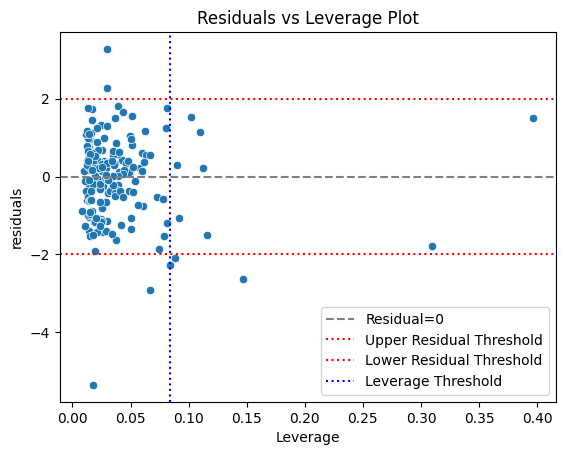

In [95]:
leverage_threshold = (2 * (p + 1)) / n
residual_upper_threshold = 2  
residual_lower_threshold = -2  
sns.scatterplot(x=leverage, y=student_resid)
plt.axhline(y=0, color='grey', linestyle='dashed', label='Residual=0')
plt.axhline(y=residual_upper_threshold, color='red', linestyle='dotted', label='Upper Residual Threshold')
plt.axhline(y=residual_lower_threshold, color='red', linestyle='dotted', label='Lower Residual Threshold')
plt.axvline(x=leverage_threshold, color='blue', linestyle='dotted', label='Leverage Threshold')
plt.xlabel('Leverage')
plt.ylabel('residuals')
plt.title('Residuals vs Leverage Plot')
plt.legend()
plt.savefig('rvsp.png')
plt.show()

### __Regression Model Comparisons:__

Regression Model after elimination of Influence points

In [96]:
influence_less_data = final_dataset.drop(elimination_outliers)
influence_less_data_model = ols("yeo_johnson_transformed ~ Clean_Fuels + Electricity_Access + Natural_Resources_Depletion + Energy_Use + PM25_Exposure + Renewable_Energy_Consumption", data = influence_less_data).fit()
print(influence_less_data_model.summary())

                               OLS Regression Results                              
Dep. Variable:     yeo_johnson_transformed   R-squared:                       0.858
Model:                                 OLS   Adj. R-squared:                  0.853
Method:                      Least Squares   F-statistic:                     175.4
Date:                     Sat, 28 Dec 2024   Prob (F-statistic):           4.75e-71
Time:                             19:03:42   Log-Likelihood:                -274.21
No. Observations:                      181   AIC:                             562.4
Df Residuals:                          174   BIC:                             584.8
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Regression Model before elimination of Influence points

In [97]:
print(final_dataset_model.summary())

                               OLS Regression Results                              
Dep. Variable:     yeo_johnson_transformed   R-squared:                       0.832
Model:                                 OLS   Adj. R-squared:                  0.827
Method:                      Least Squares   F-statistic:                     152.1
Date:                     Sat, 28 Dec 2024   Prob (F-statistic):           1.46e-68
Time:                             19:03:42   Log-Likelihood:                -312.01
No. Observations:                      191   AIC:                             638.0
Df Residuals:                          184   BIC:                             660.8
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

__Observation:__
Given comparison of model after and before elimination of Influence points we have a better R-squared post elimination. The refined model shows improved fit and stability, indicating that the original model was affected by these influential points.The removal of these points led to a more reliable and robust model, enhancing the accuracy of predictions and interpretations. Hence we are treating Influence points by removing them. 

## __10. MULTICOLLINEARITY__ 

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = influence_less_data.drop(['yeo_johnson_transformed'],axis=1).columns

In [99]:
vif_data["VIF"] = [np.sqrt(variance_inflation_factor(final_dataset.drop(['yeo_johnson_transformed'],axis=1).values, i))
                          for i in range(len(final_dataset.drop(['yeo_johnson_transformed'],axis=1).columns))]
vif_data

,feature,VIF
0,Clean_Fuels,3.799151
1,Electricity_Access,4.016019
2,Natural_Resources_Depletion,1.214166
3,Energy_Use,1.501733
4,PM25_Exposure,2.056472
5,Renewable_Energy_Consumption,1.639632


__Observation:__ All VIF values are below 10 which indicates no severe multicollinearity issues.

##### __Array of the eigenvalues__

In [100]:
X = influence_less_data.drop(['yeo_johnson_transformed'],axis=1).to_numpy()  # This is the model's design matrix (explanatory variables)
eigenvals = np.linalg.eigvals(X.T @ X)
eigenvals

array([1.38878905e+09, 9.45579641e+05, 3.58156155e+05, 3.86042202e+04,
       3.07532158e+04, 1.00693915e+04])

## __11. FINAL MODEL RESULTS__ 

In [105]:
Rig_model_final = ols("yeo_johnson_transformed ~ Clean_Fuels + Electricity_Access + Natural_Resources_Depletion + Energy_Use + PM25_Exposure + Renewable_Energy_Consumption", data = influence_less_data).fit()
residuals_final = Rig_model_final.resid
print(Rig_model_final.summary())

                               OLS Regression Results                              
Dep. Variable:     yeo_johnson_transformed   R-squared:                       0.858
Model:                                 OLS   Adj. R-squared:                  0.853
Method:                      Least Squares   F-statistic:                     175.4
Date:                     Sat, 28 Dec 2024   Prob (F-statistic):           4.75e-71
Time:                             19:06:55   Log-Likelihood:                -274.21
No. Observations:                      181   AIC:                             562.4
Df Residuals:                          174   BIC:                             584.8
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

## __HYPOTHESIS TESTING (ANOVA Results)__ 

In [102]:
table = sm.stats.anova_lm(Rig_model_final, typ=2)
print("Anova Testing for Relation among parameters")
print(table)

Anova Testing for Relation among parameters
                                  sum_sq     df           F        PR(>F)
Clean_Fuels                    14.814145    1.0   11.751975  7.586893e-04
Electricity_Access              8.082750    1.0    6.411998  1.222000e-02
Natural_Resources_Depletion     1.845606    1.0    1.464109  2.279188e-01
Energy_Use                    214.485493    1.0  170.150090  1.452879e-27
PM25_Exposure                   3.045699    1.0    2.416136  1.219078e-01
Renewable_Energy_Consumption   29.223776    1.0   23.183051  3.185197e-06
Residual                      219.338559  174.0         NaN           NaN


The notably low p-values associated with the majority of predictors serve as compelling evidence against the null hypothesis, which asserts that these predictors exert no influence on CO2 emission. This observed statistical significance implies that the variables incorporated into the analysis play an essential role in elucidating the variability observed in CO2 emission.

__Significance of Predictors:__
The markedly low p-values for variables underscore their considerable effect on CO2 emission. Furthermore, even predictors exhibiting relatively elevated p-values continue to demonstrate significance, indicating that their presence contributes meaningfully to the overall model.

Click on Given Link to Access my Code file

https://colab.research.google.com/drive/1Q4x3avuMW8nD85X4jI0Kk5S1xxte4FbD?usp=sharing